## **Soccer League DataBase EDA & Insights**
## Soccer Database Description

The dataset contains detailed information about various aspects of soccer matches, players, teams, and their attributes. Below is a summary of each table present in the dataset:

### Tables and Their Descriptions:

1. **`sqlite_sequence`**:
   - **Purpose**: Tracks the largest ROWID in each table.
   - **Columns**:
     - `name`: Table name.
     - `seq`: Largest ROWID.

2. **`Player_Attributes`**:
   - **Purpose**: Detailed attributes of soccer players over time.
   - **Columns**:
     - `id`, `player_fifa_api_id`, `player_api_id`, `date`
     - Various attributes describing skills and physical characteristics.

3. **`Player`**:
   - **Purpose**: Basic information about soccer players.
   - **Columns**:
     - `id`, `player_api_id`, `player_name`, `player_fifa_api_id`, `birthday`, `height`, `weight`.

4. **`Match`**:
   - **Purpose**: Detailed information about soccer matches.
   - **Columns**:
     - `id`, `country_id`, `league_id`, `season`, `stage`, `date`, `match_api_id`, `home_team_api_id`, `away_team_api_id`, `home_team_goal`, `away_team_goal`
     - Various match statistics and betting odds.

5. **`League`**:
   - **Purpose**: Information about soccer leagues.
   - **Columns**:
     - `id`, `country_id`, `name`.

6. **`Country`**:
   - **Purpose**: Information about countries.
   - **Columns**:
     - `id`, `name`.

7. **`Team`**:
   - **Purpose**: Information about soccer teams.
   - **Columns**:
     - `id`, `team_api_id`, `team_fifa_api_id`, `team_long_name`, `team_short_name`.

8. **`Team_Attributes`**:
   - **Purpose**: Detailed attributes of soccer teams over time.
   - **Columns**:
     - `id`, `team_fifa_api_id`, `team_api_id`, `date`
     - Various attributes describing playing style and strategy.

This dataset is ideal for analyzing soccer matches, player performance, team strategies, and more. Researchers and enthusiasts can use this data to uncover trends, predict match outcomes, and explore various aspects of soccer analytics.

## Extract and Import Data from the database

### Step 1: Import Libraries and Load the Dataset

In [77]:
import sqlite3
import pandas as pd
import matplotlib as plt
import re
import numpy as np
import xml.etree.ElementTree as ET
from scipy import stats
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC



In [2]:
# Connect to the SQLite database
database_path = 'database.sqlite' 
conn = sqlite3.connect(database_path)

# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)

Tables in the database:
                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes


In [3]:
# Load the tables into pandas DataFrame
sqlite_sequence = pd.read_sql_query("SELECT * FROM sqlite_sequence", conn)
print('The columns for sqlite_sequence are :',sqlite_sequence.info())
# Save the dataframes to CSV files in the working directory
#sqlite_sequence.to_csv('/kaggle/working/sqlite_sequence.csv', index=False)

print("sqlite_sequence DataFrame:")
sqlite_sequence.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    7 non-null      object
 1   seq     7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes
The columns for sqlite_sequence are : None
sqlite_sequence DataFrame:


,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075


In [4]:
player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

player_attributes.drop("id", axis=1, inplace=True)
print('The columns for player_attributes are :',player_attributes.info())
#player_attributes.to_csv('/kaggle/working/player_attributes.csv', index=False)

print("\nPlayer Attributes DataFrame:")
player_attributes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   date                 183978 non-null  object 
 3   overall_rating       183142 non-null  float64
 4   potential            183142 non-null  float64
 5   preferred_foot       183142 non-null  object 
 6   attacking_work_rate  180748 non-null  object 
 7   defensive_work_rate  183142 non-null  object 
 8   crossing             183142 non-null  float64
 9   finishing            183142 non-null  float64
 10  heading_accuracy     183142 non-null  float64
 11  short_passing        183142 non-null  float64
 12  volleys              181265 non-null  float64
 13  dribbling            183142 non-null  float64
 14  curve                181265 non-null  float64
 15  free_kick_accurac

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
# Load the Player table into a pandas DataFrame
player = pd.read_sql_query("SELECT * FROM Player", conn)

player.drop("id", axis=1, inplace=True)
print('The columns for player_table are :',player.info())
# Save the Player DataFrame to a CSV file in the working directory
#player.to_csv('/kaggle/working/player.csv', index=False)

# Display the first few rows of the Player DataFrame
print("Player DataFrame:")
player.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_api_id       11060 non-null  int64  
 1   player_name         11060 non-null  object 
 2   player_fifa_api_id  11060 non-null  int64  
 3   birthday            11060 non-null  object 
 4   height              11060 non-null  float64
 5   weight              11060 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 518.6+ KB
The columns for player_table are : None
Player DataFrame:


,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [6]:
league = pd.read_sql_query("SELECT * FROM League", conn)

league.drop("id", axis=1, inplace=True)
print('The columns for league_table are :',league.info())
#league.to_csv('/kaggle/working/league.csv', index=False)

print("\nLeague DataFrame:")
league.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country_id  11 non-null     int64 
 1   name        11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes
The columns for league_table are : None

League DataFrame:


,country_id,name
0,1,Belgium Jupiler League
1,1729,England Premier League
2,4769,France Ligue 1
3,7809,Germany 1. Bundesliga
4,10257,Italy Serie A


In [7]:
country = pd.read_sql_query("SELECT * FROM Country", conn)


print('The columns for country_table are :',country.info())
#country.to_csv('/kaggle/working/country.csv', index=False)

print("\nCountry DataFrame:")
country.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes
The columns for country_table are : None

Country DataFrame:


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [8]:
team = pd.read_sql_query("SELECT * FROM Team", conn)
team.drop("id", axis=1, inplace=True)

print('The columns for team_table are :',team.info())
#team.to_csv('/kaggle/working/team.csv', index=False)

print("\nTeam DataFrame:")
team.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   team_api_id       299 non-null    int64  
 1   team_fifa_api_id  288 non-null    float64
 2   team_long_name    299 non-null    object 
 3   team_short_name   299 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 9.5+ KB
The columns for team_table are : None

Team DataFrame:


,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,9987,673.0,KRC Genk,GEN
1,9993,675.0,Beerschot AC,BAC
2,10000,15005.0,SV Zulte-Waregem,ZUL
3,9994,2007.0,Sporting Lokeren,LOK
4,9984,1750.0,KSV Cercle Brugge,CEB


In [9]:
# Load the Team_Attributes table into a pandas DataFrame
team_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

team_attributes.drop("id", axis=1, inplace=True)

print('The columns for team_attributes are :',team_attributes.info())
# Replace invalid values (NaNs) with 0
team_attributes.fillna(0, inplace=True)

# Save the Team_Attributes DataFrame to a CSV file in the working directory
#team_attributes.to_csv('/kaggle/working/team_attributes.csv', index=False)

# Display the first few rows of the Team_Attributes DataFrame
print("Team Attributes DataFrame:")
team_attributes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_fifa_api_id                1458 non-null   int64  
 1   team_api_id                     1458 non-null   int64  
 2   date                            1458 non-null   object 
 3   buildUpPlaySpeed                1458 non-null   int64  
 4   buildUpPlaySpeedClass           1458 non-null   object 
 5   buildUpPlayDribbling            489 non-null    float64
 6   buildUpPlayDribblingClass       1458 non-null   object 
 7   buildUpPlayPassing              1458 non-null   int64  
 8   buildUpPlayPassingClass         1458 non-null   object 
 9   buildUpPlayPositioningClass     1458 non-null   object 
 10  chanceCreationPassing           1458 non-null   int64  
 11  chanceCreationPassingClass      1458 non-null   object 
 12  chanceCreationCrossing          14

,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,434,9930,2010-02-22 00:00:00,60,Balanced,0.0,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,77,8485,2010-02-22 00:00:00,70,Fast,0.0,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,77,8485,2011-02-22 00:00:00,47,Balanced,0.0,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


## fetch the match table , inspect it, and then parse the xml columns with correct process

In [10]:
match = pd.read_sql_query("SELECT * FROM Match", conn)
match.drop("id", axis=1, inplace=True)


print('The columns for match_table are :',match.info())

# Display all column names
columns = match.columns.tolist()
print(columns)

# Check data types of each column
print("\nData Types:")
print(match.dtypes.to_list())
#match.to_csv('/kaggle/working/match.csv', index=False)

# Identify XML columns
xml_match_columns = match.select_dtypes(include=['object']).columns
print(f"XML Columns: {xml_match_columns}")
print(f"Number of XML Columns: {len(xml_match_columns)}")

print("\nMatch DataFrame:")
match.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 114 entries, country_id to BSA
dtypes: float64(96), int64(8), object(10)
memory usage: 22.6+ MB
The columns for match_table are : None
['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


## Preparing the match table 


In [11]:
# Function to extract values from XML data
def extract_xml_values(xml_data, tag):
    try:
        root = ET.fromstring(xml_data)
        values = [int(value.find(tag).text) for value in root.findall('value') if value.find(tag) is not None]
        # Return the sum or another aggregated measure (e.g., average)
        return sum(values) if values else np.nan
    except (ET.ParseError, AttributeError, TypeError):
        return np.nan  # Handle parsing errors or missing values


In [12]:

# List of XML columns and the tags to extract
xml_columns = {
    'goal': 'goal',
    'shoton': 'elapsed',
    'shotoff': 'elapsed',
    'foulcommit': 'elapsed',
    'card': 'card',
    'cross': 'cross',
    'corner': 'corner',
    'possession': 'homepos'
}

# Process each XML column
for col, tag in xml_columns.items():
    match[col] = match[col].apply(lambda x: extract_xml_values(x, tag) if pd.notnull(x) else np.nan)

# Fill NaN values with 0 for numerical consistency
match.fillna(0, inplace=True)


relevant_columns = [ 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 
    'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal',
    'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']

processed_df = match[relevant_columns]

# Save the processed DataFrame to a CSV file
#processed_df.to_csv('/kaggle/working/processed_match.csv', index=False)

# Print the processed DataFrame
print("\nProcessed Match DataFrame:")
processed_df.head()


Processed Match DataFrame:


,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_id        25979 non-null  int64  
 1   league_id         25979 non-null  int64  
 2   season            25979 non-null  object 
 3   stage             25979 non-null  int64  
 4   date              25979 non-null  object 
 5   match_api_id      25979 non-null  int64  
 6   home_team_api_id  25979 non-null  int64  
 7   away_team_api_id  25979 non-null  int64  
 8   home_team_goal    25979 non-null  int64  
 9   away_team_goal    25979 non-null  int64  
 10  goal              25979 non-null  float64
 11  shoton            25979 non-null  float64
 12  shotoff           25979 non-null  float64
 13  foulcommit        25979 non-null  float64
 14  card              25979 non-null  float64
 15  cross             25979 non-null  float64
 16  corner            25979 non-null  float6

## Preparing TEam level data

In [14]:
# Select relevant columns from team and team_attributes
team_df_selected = team[['team_api_id', 'team_long_name']].rename(columns={'team_long_name': 'team_name'})
team_attributes_df_selected = team_attributes[['team_api_id', 'date', 'buildUpPlaySpeed', 'buildUpPlayPassing', 
                                                'chanceCreationPassing', 'chanceCreationCrossing', 
                                                'chanceCreationShooting', 'defencePressure', 'defenceAggression', 
                                                'defenceTeamWidth']]



# Ensure you're working with a copy of the DataFrame
team_attributes_df_selected = team_attributes_df_selected.copy()

# Convert the 'date' column to datetime using .loc to avoid the warning
team_attributes_df_selected.loc[:, 'date'] = pd.to_datetime(team_attributes_df_selected['date'])

# Merge team and team_attributes on team_api_id
team_data = team_df_selected.merge(team_attributes_df_selected, on='team_api_id', how='left')

# Display the merged dataframe to check
team_data.head()


,team_api_id,team_name,date,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,9987,KRC Genk,2010-02-22 00:00:00,45.0,45.0,50.0,35.0,60.0,70.0,65.0,70.0
1,9987,KRC Genk,2011-02-22 00:00:00,66.0,52.0,65.0,66.0,51.0,48.0,47.0,54.0
2,9987,KRC Genk,2012-02-22 00:00:00,53.0,55.0,55.0,48.0,56.0,47.0,45.0,55.0
3,9987,KRC Genk,2013-09-20 00:00:00,58.0,38.0,67.0,48.0,56.0,47.0,45.0,55.0
4,9987,KRC Genk,2014-09-19 00:00:00,58.0,38.0,67.0,48.0,56.0,47.0,45.0,55.0


## Preparing player level data

In [15]:
# Selecting important columns from player_attributes
player_data = player_attributes[['player_api_id', 'overall_rating', 'potential', 'preferred_foot', 
                                 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
                                 'dribbling', 'ball_control', 'acceleration', 'sprint_speed', 
                                 'stamina', 'positioning', 'marking', 
                                 'standing_tackle', 'sliding_tackle']]

# Selecting height and weight from player
player_info = player[['player_api_id', 'height', 'weight']]

# Merging height and weight with player attributes
player_data = player_data.merge(player_info, on='player_api_id', how='left')

# Checking the result
print(player_data.info())
player_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183978 non-null  int64  
 1   overall_rating       183142 non-null  float64
 2   potential            183142 non-null  float64
 3   preferred_foot       183142 non-null  object 
 4   attacking_work_rate  180748 non-null  object 
 5   defensive_work_rate  183142 non-null  object 
 6   crossing             183142 non-null  float64
 7   finishing            183142 non-null  float64
 8   dribbling            183142 non-null  float64
 9   ball_control         183142 non-null  float64
 10  acceleration         183142 non-null  float64
 11  sprint_speed         183142 non-null  float64
 12  stamina              183142 non-null  float64
 13  positioning          183142 non-null  float64
 14  marking              183142 non-null  float64
 15  standing_tackle  

,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,dribbling,ball_control,acceleration,sprint_speed,stamina,positioning,marking,standing_tackle,sliding_tackle,height,weight
0,505942,67.0,71.0,right,medium,medium,49.0,44.0,51.0,49.0,60.0,64.0,54.0,45.0,65.0,69.0,69.0,182.88,187
1,505942,67.0,71.0,right,medium,medium,49.0,44.0,51.0,49.0,60.0,64.0,54.0,45.0,65.0,69.0,69.0,182.88,187
2,505942,62.0,66.0,right,medium,medium,49.0,44.0,51.0,49.0,60.0,64.0,54.0,45.0,65.0,66.0,69.0,182.88,187
3,505942,61.0,65.0,right,medium,medium,48.0,43.0,50.0,48.0,60.0,64.0,54.0,44.0,62.0,63.0,66.0,182.88,187
4,505942,61.0,65.0,right,medium,medium,48.0,43.0,50.0,48.0,60.0,64.0,54.0,44.0,62.0,63.0,66.0,182.88,187


## Optimize Data Types

In [16]:
# Function to optimize data types
def optimize_data_types(df):
    df = df.copy()  # Avoid modifying the original DataFrame
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = df[col].astype('float32')  # Explicitly downcast to float32
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = df[col].astype('int32')  # Explicitly downcast to int32
    return df

# Apply the function to all DataFrames
processed_df = optimize_data_types(processed_df)
country = optimize_data_types(country)
league = optimize_data_types(league)
team = optimize_data_types(team)
player = optimize_data_types(player)
player_data = optimize_data_types(player_data)
team_data = optimize_data_types(team_data)



In [17]:
# Check updated memory usage
processed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_id        25979 non-null  int32  
 1   league_id         25979 non-null  int32  
 2   season            25979 non-null  object 
 3   stage             25979 non-null  int32  
 4   date              25979 non-null  object 
 5   match_api_id      25979 non-null  int32  
 6   home_team_api_id  25979 non-null  int32  
 7   away_team_api_id  25979 non-null  int32  
 8   home_team_goal    25979 non-null  int32  
 9   away_team_goal    25979 non-null  int32  
 10  goal              25979 non-null  float32
 11  shoton            25979 non-null  float32
 12  shotoff           25979 non-null  float32
 13  foulcommit        25979 non-null  float32
 14  card              25979 non-null  float32
 15  cross             25979 non-null  float32
 16  corner            25979 non-null  float3

## Merging the required Tables with Match Dataframe

In [18]:
# Function to display null values and rows to be dropped
def display_null_info(df, df_name):
    print(f"Null values in {df_name}:")
    print(df.isnull().sum())
    print(f"\nTotal rows in {df_name}: {len(df)}")
    print(f"Rows with any null values in {df_name}: {df.isnull().any(axis=1).sum()}\n")

# Display null info for each dataframe
display_null_info(processed_df, 'processed_df')
display_null_info(country, 'country')
display_null_info(league, 'league')
display_null_info(player_data, 'player_data')
display_null_info(team, 'team')

Null values in processed_df:
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
goal                0
shoton              0
shotoff             0
foulcommit          0
card                0
cross               0
corner              0
possession          0
dtype: int64

Total rows in processed_df: 25979
Rows with any null values in processed_df: 0

Null values in country:
id      0
name    0
dtype: int64

Total rows in country: 11
Rows with any null values in country: 0

Null values in league:
country_id    0
name          0
dtype: int64

Total rows in league: 11
Rows with any null values in league: 0

Null values in player_data:
player_api_id             0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                83

In [19]:
# Handle missing and invalid values in the dataframes
processed_df.replace([np.inf, -np.inf], np.nan, inplace=True)
country.replace([np.inf, -np.inf], np.nan, inplace=True)
team.replace([np.inf, -np.inf], np.nan, inplace=True)

In [20]:
# Renaming columns for clarity
team_df_selected = team[['team_api_id', 'team_long_name']].rename(columns={'team_long_name': 'team_name'})
country_df_selected = country[['id', 'name']].rename(columns={'id': 'country_id', 'name': 'country_name'})
team_attributes_df_selected = team_attributes[['team_api_id', 'date']].rename(columns={'date': 'team_attribute_date'})
league_df_selected = league[['country_id', 'name']].rename(columns={'name': 'league_name'})


# Convert date columns to datetime format
team_attributes_df_selected['team_attribute_date'] = pd.to_datetime(team_attributes_df_selected['team_attribute_date'])
processed_df['date'] = pd.to_datetime(processed_df['date'])

### Merging Process Explanation

#### 1️⃣ Merging `processed_df` with `country_df_selected`
Each match is associated with a specific country through the `country_id`. By merging `processed_df` with `country_df_selected`, we can include the country name for better readability and analysis.




In [21]:
# 1️⃣ Merge processed_df with country_df_selected
merged_df1 = processed_df.merge(country_df_selected, on='country_id', how='left')

#### 2️⃣ Merging `merged_df` with `team_df_selected` for Home & Away Teams
Each match involves two teams: `home_team_api_id` and `away_team_api_id`. We perform two separate merges to include the team names for both home and away teams, making the dataset more interpretable.



In [22]:
# 2️⃣ Merge Home Team Names
merged_df2 = merged_df1.merge(team_df_selected, left_on='home_team_api_id', right_on='team_api_id', how='left') \
                        .rename(columns={'team_name': 'home_team_name'}) \
                        .drop(columns=['team_api_id'])


merged_df3 = merged_df2.merge(team_df_selected, left_on='away_team_api_id', right_on='team_api_id', how='left') \
                        .rename(columns={'team_name': 'away_team_name'}) \
                        .drop(columns=['team_api_id'])

#### 3️⃣ Merging `merged_df` with `team_attributes_df_selected`
The `team_attributes_df_selected` table contains multiple records for each team over time. To accurately associate team attributes with each match, we merge based on the closest available date. This ensures we are using relevant team characteristics for analysis.

In [23]:
# 3️⃣ Merge Home Team Attributes
merged_df4 = merged_df3.merge(team_attributes_df_selected, 
                               left_on=['home_team_api_id', 'date'], 
                               right_on=['team_api_id', 'team_attribute_date'], 
                               how='left') \
                        .rename(columns={'team_attribute_date': 'home_team_attribute_date'}) \
                        .drop(columns=['team_api_id'])

# Merge Away Team Attributes
merged_df5 = merged_df4.merge(team_attributes_df_selected, 
                       left_on=['away_team_api_id', 'date'], 
                       right_on=['team_api_id', 'team_attribute_date'], 
                       how='left') \
               .rename(columns={'team_attribute_date': 'away_team_attribute_date'}) \
               .drop(columns=['team_api_id'])


### 4️⃣ Merge with league_df_selected

In [24]:
# 4️⃣ Merge with league_df_selected
df = merged_df5.merge(league_df_selected, left_on='country_id', right_on='country_id', how='left') \
                        .rename(columns={'league_name': 'tournament_type'}) \
                        .drop(columns=['league_id'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   country_id                25979 non-null  int32         
 1   season                    25979 non-null  object        
 2   stage                     25979 non-null  int32         
 3   date                      25979 non-null  datetime64[ns]
 4   match_api_id              25979 non-null  int32         
 5   home_team_api_id          25979 non-null  int32         
 6   away_team_api_id          25979 non-null  int32         
 7   home_team_goal            25979 non-null  int32         
 8   away_team_goal            25979 non-null  int32         
 9   goal                      25979 non-null  float32       
 10  shoton                    25979 non-null  float32       
 11  shotoff                   25979 non-null  float32       
 12  foulcommit        

******
## EDA: 
******
Let's start with the 
## **Question 1: Key Factors Influencing Match Outcomes**
We'll analyze various match statistics to see which ones correlate most with match outcomes (Win, Loss, Draw).

### Step 1: Calculate Goal Difference and Match Result

In [26]:

# Step 1: Calculate Goal Difference
df['goal_difference'] = df['home_team_goal'] - df['away_team_goal']

# Step 2: Define Match Outcome
df['match_result'] = df.apply(lambda row: 'Home Win' if row['home_team_goal'] > row['away_team_goal'] else 
                              ('Away Win' if row['home_team_goal'] < row['away_team_goal'] else 'Draw'), axis=1)

# Display the first few rows to check the new columns
print("\nMatch DataFrame with Goal Difference and Match Result:")
df[['home_team_goal', 'away_team_goal', 'goal_difference', 'match_result']].head()



Match DataFrame with Goal Difference and Match Result:


,home_team_goal,away_team_goal,goal_difference,match_result
0,1,1,0,Draw
1,0,0,0,Draw
2,0,3,-3,Away Win
3,5,0,5,Home Win
4,1,3,-2,Away Win


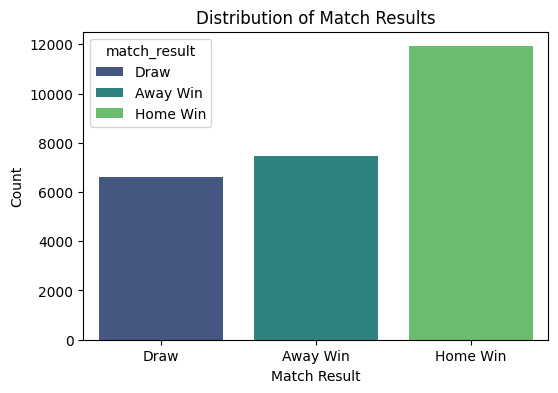

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of match results with hue
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='match_result', hue='match_result', palette='viridis', legend=True)
plt.title('Distribution of Match Results')
plt.xlabel('Match Result')
plt.ylabel('Count')
# Save the figure
plt.savefig('match_results_distribution.png', bbox_inches='tight')
plt.show()



## Step 2: Check Correlations between Features and Match Result

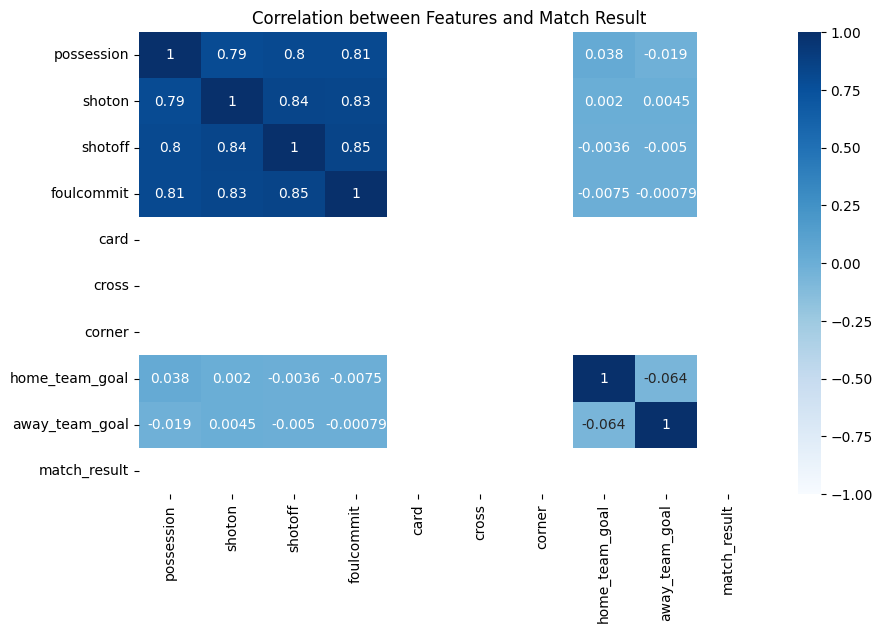

In [88]:
# Step 3: Select Relevant Features 
features = ['possession', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'home_team_goal', 'away_team_goal']
df_selected = df[features + ['match_result']].copy()  # Use .copy() to avoid the warning

# Convert match_result to numerical values
df_selected.loc[:, 'match_result'] = df_selected['match_result'].map({'win': 1, 'draw': 0, 'loss': -1})

# Step 4: Check Correlations between Features and Match Result
correlation_matrix = df_selected.corr()

# Step 5: Visualize Correlation with Match Result (Including Goal Difference)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation between Features and Match Result")
# Save the heatmap
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()


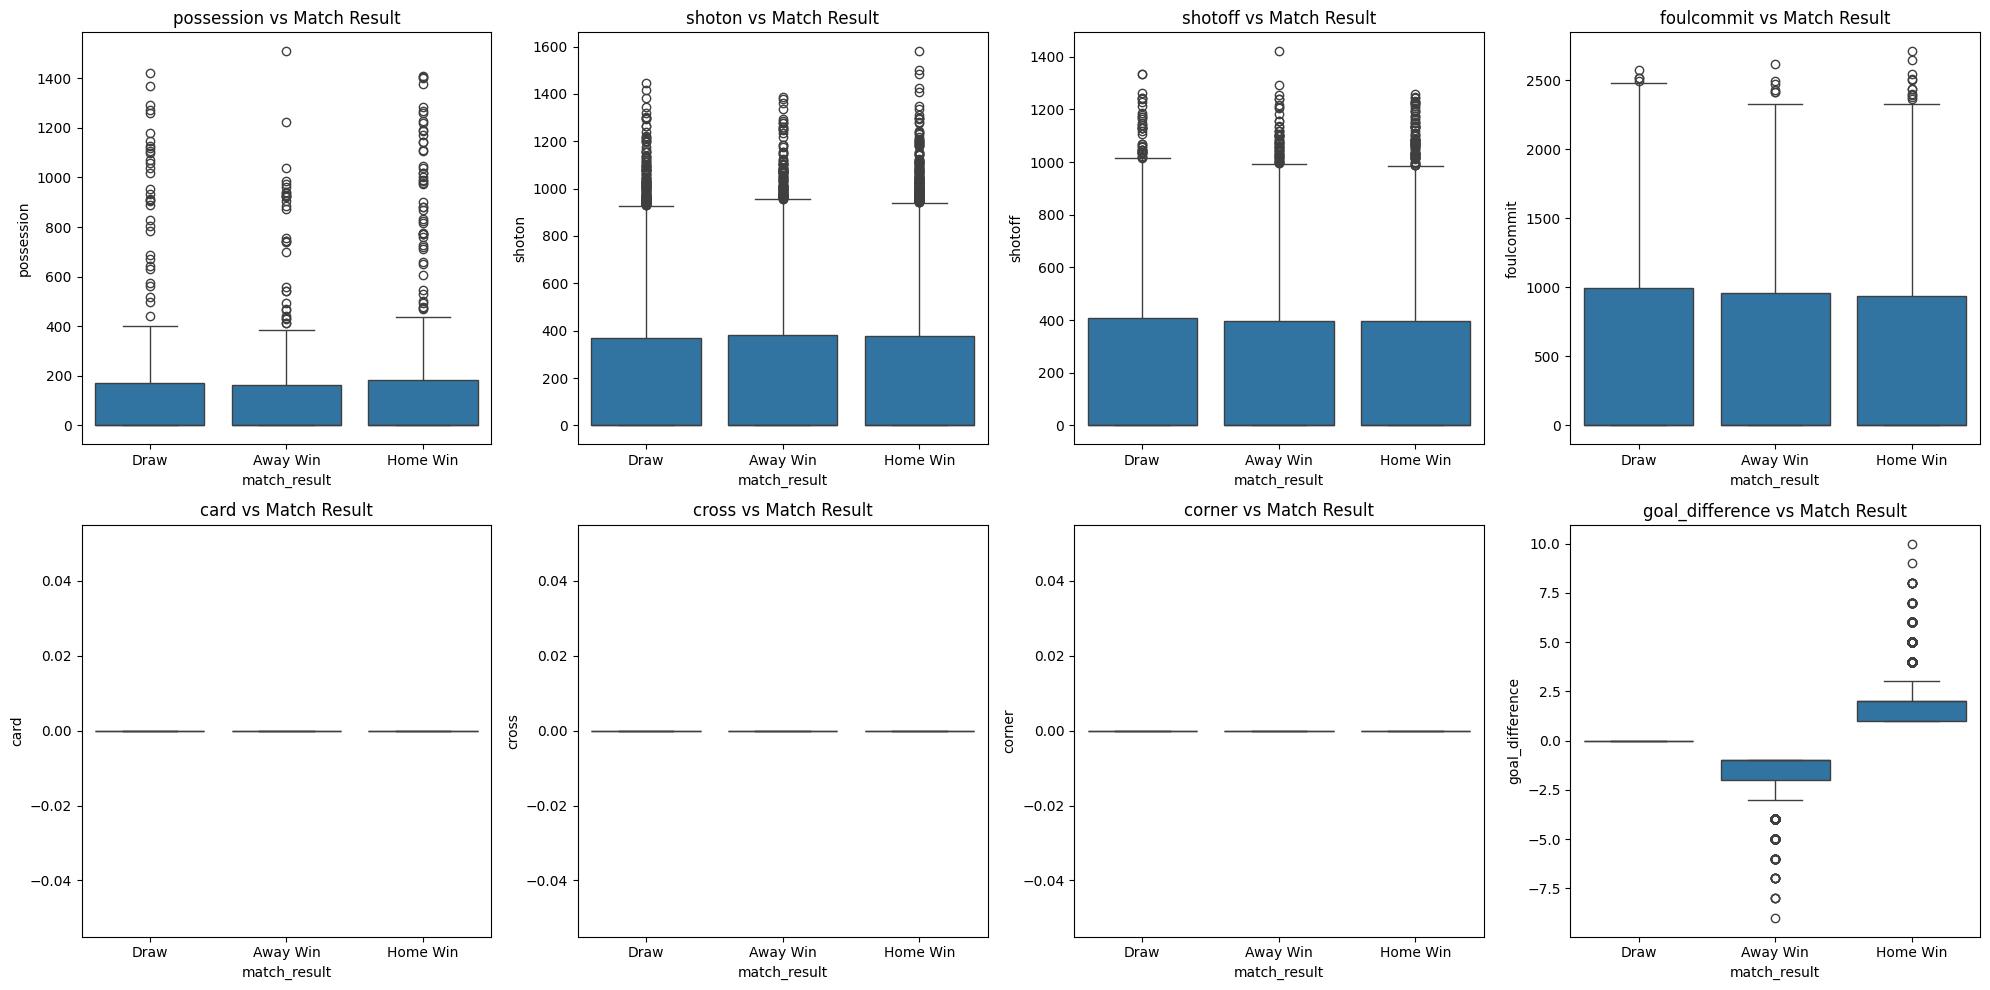

In [89]:
# Step 1: Define the features for which you want to create boxplots
features = ['possession', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'goal_difference']

# Step 2: Create subplots with an adjusted layout (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the size for a 2x4 grid

# Step 3: Flatten axes to make it easier to index in the loop
axes = axes.flatten()

# Step 4: Loop through the features and plot boxplots in the grid
for i, feature in enumerate(features):
    sns.boxplot(x='match_result', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs Match Result')

# Adjust layout to prevent overlap
plt.tight_layout()
# Save the boxplot figure
plt.savefig('boxplots_match_result.png', bbox_inches='tight')

plt.show()


### Answer to Question  1: Key Factors Influencing Match Outcomes

#### Correlation Analysis

The correlation matrix reveals several important relationships between match statistics and the likelihood of winning a match:

1. **Possession and Shots**:
   - **Possession** is strongly correlated with **shots on target (0.79)** and **shots off target (0.8)**. This indicates that teams with higher possession are more likely to create shooting opportunities.
   - **Shots on target** and **shots off target** are also highly correlated (0.84), suggesting that teams that shoot more tend to have both types of shots.

2. **Fouls Committed**:
   - **Fouls committed** show a strong correlation with **possession (0.81)**, **shots on target (0.83)**, and **shots off target (0.85)**. This could imply that teams with higher possession and more shots tend to commit more fouls, possibly due to more aggressive play.

3. **Goals Scored**:
   - **Home team goals** have a slightly higher correlation with **match result (0.036)** compared to **away team goals (0.019)**. This suggests that scoring at home might have a stronger influence on the match outcome.
   - However, the overall correlations between goals scored and match result are relatively low, indicating that other factors might also significantly impact the final result.
  
4. **Cards, Crosses, and Corners**:
   - **Cards**, **crosses**, and **corners** show no significant correlation with the match result. This indicates that these factors have minimal direct impact on the likelihood of winning a match.
4. **Match Result**:
   - The **match result** has low correlations with most features, suggesting that while these statistics are important, they might not be the sole determinants of the match outcome. Other factors, such as team strategy, player form, and in-game decisions, could also play crucial roles.

### Summing up

While possession, shots on target, and fouls committed are important indicators of a team's performance, their direct correlation with the match result is relatively low. This suggests that winning a match is influenced by a combination of various factors, and not just by individual statistics. Further analysis, including more granular data and advanced modeling techniques, could provide deeper insights into the key determinants of match outcomes.

### Question 2. Are there any seasonal trends in match outcomes, such as higher goal 
counts or win rates during specific months or tournaments?   -
○ Analyze whether certain months or specific seasons tend to have high r
goals or more home-team win   -.
○ Investigate the impact of tournament type (e.g., league vs. cup) on m tch
outc
omes.

#### Objective:
The goal of this analysis is to explore potential seasonal trends in football match outcomes. We will focus on understanding whether certain months or specific seasons tend to see **higher goal counts** or **more home-team wins**. Additionally, we will investigate how **tournament type** (e.g., **league** vs **cup**) might influence match outcomes such as goals scored and the probability of home-team wins.

#### Approach:
To answer these questions, I will take the following steps:

1. **Monthly Trends**:
   - **Analyze** how match outcomes (goals scored and home-team wins) vary across **different months**. This will help us identify if there are any trends such as higher goal counts or more wins for the home team during specific months.
   - **Visualize** the trends using line graphs and bar charts to compare match outcomes month-by-month.

2. **Seasonal Trends**:
   - **Explore** how match results (goals and home wins) differ across **different seasons** (e.g., 2018/2019, 2019/2020). We aim to uncover any variations in goal scoring or home-team success from one season to the next.
   - **Visualize** these differences using bar charts or line plots to show the performance over time.

3. **Tournament Type**:
   - **Investigate** whether the **tournament type** (e.g., **league matches** vs **cup matches**) has an impact on match outcomes. Do we see more goals or higher home-team win rates in one tournament type compared to the other?
   - **Compare** the match results based on tournament type using bar plots or box plots for clarity.

By breaking down the match outcomes based on months, seasons, and tournament types, we aim to identify patterns that could be useful for predicting match outcomes in future games.


## 1️⃣ Monthly Trends: Goals and Home-Team Win

Total Goals by Month:
month
1     5821
2     7448
3     7298
4     8145
5     6407
6       84
7      596
8     5988
9     7066
10    7120
11    7457
12    6857
Name: total_goals, dtype: int32

Home Team Win Rate by Month:
month
1     0.468621
2     0.458010
3     0.466427
4     0.459414
5     0.466370
6     0.565217
7     0.454128
8     0.425308
9     0.455534
10    0.468942
11    0.462578
12    0.452853
Name: home_team_win, dtype: float64


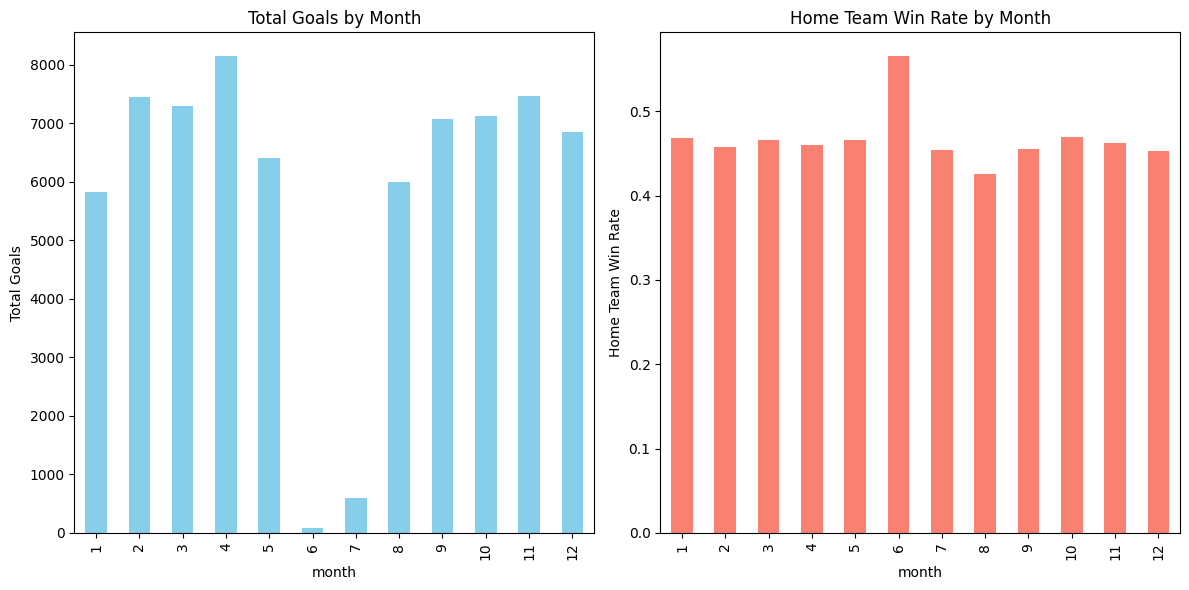

In [90]:
# Extract month and year from the date column
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Calculate total goals for each month
df['total_goals'] = df['home_team_goal'] + df['away_team_goal']
monthly_goals = df.groupby('month')['total_goals'].sum()

# Calculate home-team wins
df['home_team_win'] = df['home_team_goal'] > df['away_team_goal']
monthly_home_wins = df.groupby('month')['home_team_win'].mean()

# Print total goals by month
print("Total Goals by Month:")
print(monthly_goals)

# Print home team win rate by month
print("\nHome Team Win Rate by Month:")
print(monthly_home_wins)

# Plot monthly goals and home-team wins
plt.figure(figsize=(12, 6))

# Subplot for goals
plt.subplot(1, 2, 1)
monthly_goals.plot(kind='bar', color='skyblue', title="Total Goals by Month")
plt.ylabel('Total Goals')

# Subplot for home team wins
plt.subplot(1, 2, 2)
monthly_home_wins.plot(kind='bar', color='salmon', title="Home Team Win Rate by Month")
plt.ylabel('Home Team Win Rate')

plt.tight_layout()
# Save the figure
plt.savefig('monthly_goals_and_home_wins.png', bbox_inches='tight')

plt.show()


## 2️⃣ Seasonal Trends: Goals and Home-Team Wins by Season


Total Goals by Season:
season
2008/2009    8672
2009/2010    8632
2010/2011    8749
2011/2012    8747
2012/2013    9039
2013/2014    8389
2014/2015    8897
2015/2016    9162
Name: total_goals, dtype: int32

Home Team Win Rate by Season:
season
2008/2009    0.470836
2009/2010    0.474303
2010/2011    0.466258
2011/2012    0.465217
2012/2013    0.442945
2013/2014    0.463061
2014/2015    0.449323
2015/2016    0.438665
Name: home_team_win, dtype: float64


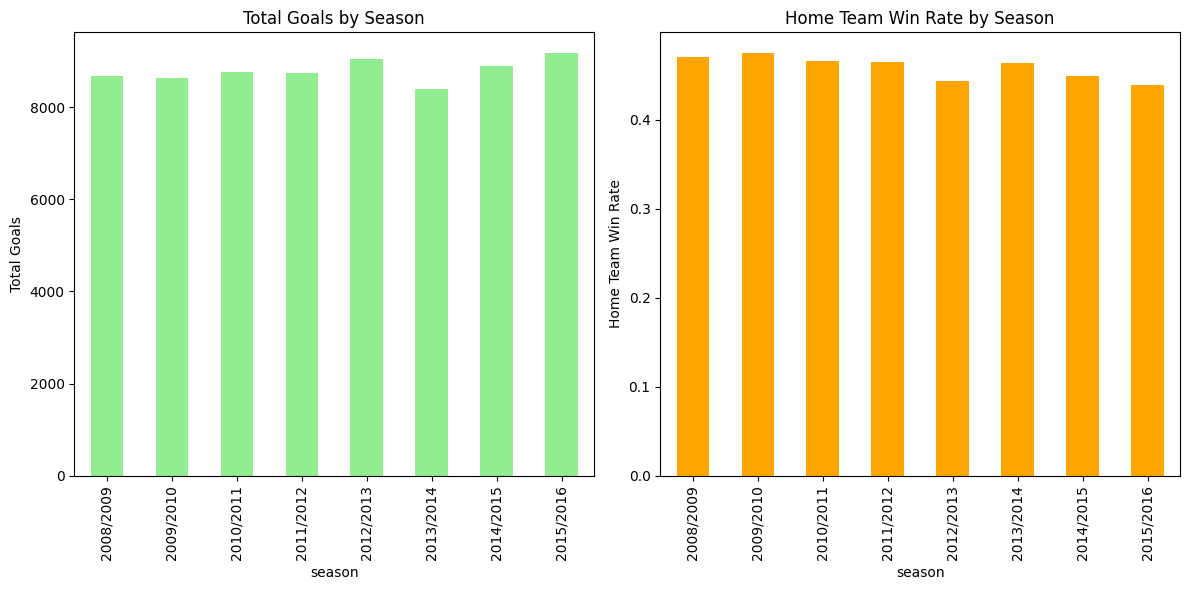

In [91]:
# Calculate total goals and home-team win rate by season
seasonal_goals = df.groupby('season')['total_goals'].sum()
seasonal_home_wins = df.groupby('season')['home_team_win'].mean()

# Print total goals by season
print("\nTotal Goals by Season:")
print(seasonal_goals)

# Print home team win rate by season
print("\nHome Team Win Rate by Season:")
print(seasonal_home_wins)

# Plot seasonal goals and home-team wins
plt.figure(figsize=(12, 6))

# Subplot for goals
plt.subplot(1, 2, 1)
seasonal_goals.plot(kind='bar', color='lightgreen', title="Total Goals by Season")
plt.ylabel('Total Goals')

# Subplot for home team wins
plt.subplot(1, 2, 2)
seasonal_home_wins.plot(kind='bar', color='orange', title="Home Team Win Rate by Season")
plt.ylabel('Home Team Win Rate')

plt.tight_layout()
# Save the figure
plt.savefig('Home Team Win Rate.png', bbox_inches='tight')
plt.show()


## 3️⃣ Tournament Type Impact (League vs. Cup)

Total Goals by Tournament Type:
tournament_type
Belgium Jupiler League      4841
England Premier League      8240
France Ligue 1              7427
Germany 1. Bundesliga       7103
Italy Serie A               7895
Netherlands Eredivisie      7542
Poland Ekstraklasa          4656
Portugal Liga ZON Sagres    5201
Scotland Premier League     4804
Spain LIGA BBVA             8412
Switzerland Super League    4166
Name: total_goals, dtype: int32

Home Team Win Rate by Tournament Type:
tournament_type
Belgium Jupiler League      0.468750
England Premier League      0.457237
France Ligue 1              0.447039
Germany 1. Bundesliga       0.452206
Italy Serie A               0.466357
Netherlands Eredivisie      0.478350
Poland Ekstraklasa          0.453125
Portugal Liga ZON Sagres    0.442495
Scotland Premier League     0.416667
Spain LIGA BBVA             0.488487
Switzerland Super League    0.457103
Name: home_team_win, dtype: float64


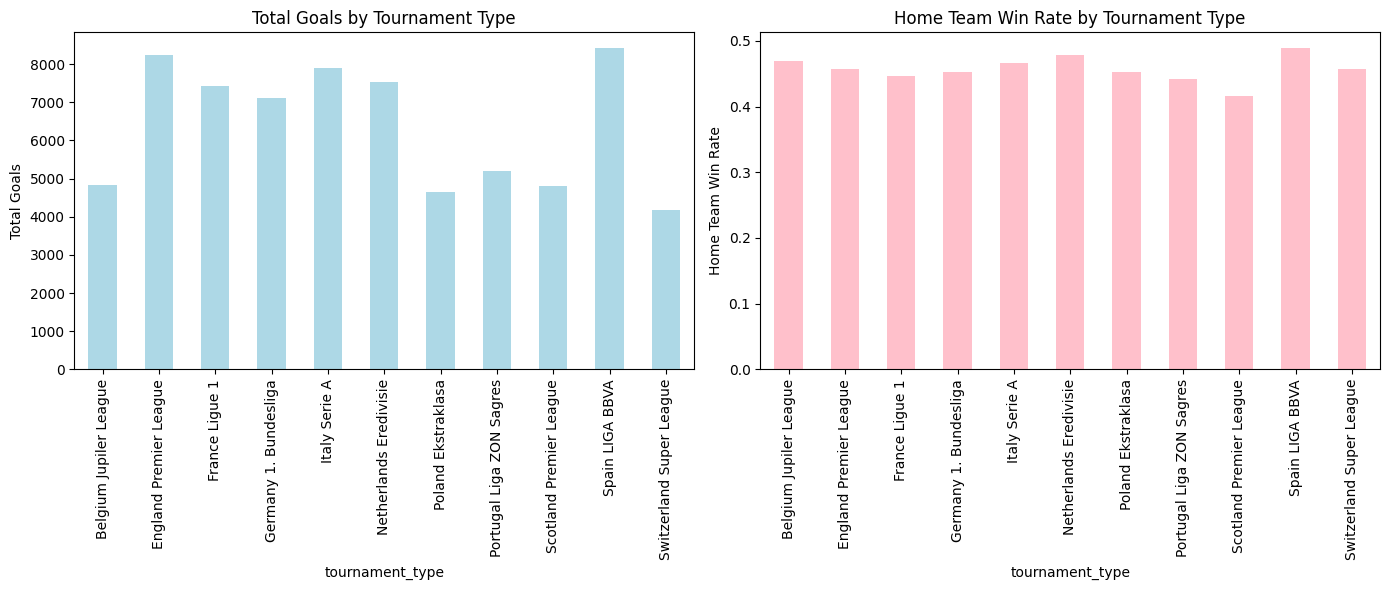

In [92]:
# 1️⃣ Group data by tournament type and calculate total goals and home team win rate
tournament_goals = df.groupby('tournament_type')['total_goals'].sum()
tournament_home_wins = df.groupby('tournament_type')['home_team_win'].mean()

# Print total goals by tournament type
print("Total Goals by Tournament Type:")
print(tournament_goals)

# Print home team win rate by tournament type
print("\nHome Team Win Rate by Tournament Type:")
print(tournament_home_wins)


# 2️⃣ Plot the impact of tournament type on match outcomes

# Set up subplots
plt.figure(figsize=(14, 6))

# Subplot for total goals by tournament type
plt.subplot(1, 2, 1)
tournament_goals.plot(kind='bar', color='lightblue', title="Total Goals by Tournament Type")
plt.ylabel('Total Goals')

# Subplot for home team win rate by tournament type
plt.subplot(1, 2, 2)
tournament_home_wins.plot(kind='bar', color='pink', title="Home Team Win Rate by Tournament Type")
plt.ylabel('Home Team Win Rate')

# Tight layout to avoid overlapping
plt.tight_layout()

# Save the figure
plt.savefig('Home Team Win Rate by Tournament Type.png', bbox_inches='tight')
plt.show()


### Trend Analysis for question 2:

#### 1️⃣ Monthly Trends:
- **Total Goals by Month**:  
  From the monthly goals data, we can observe that the highest total goals occur in **April (8145 goals)** and the lowest in **June (84 goals)**. The large dip in June is likely due to fewer matches being played in that month, possibly due to the summer break in some leagues.
  
- **Home Team Win Rate by Month**:  
  The home team win rate fluctuates throughout the year. The highest home team win rate occurs in **June (56.52%)**, likely due to fewer matches in the summer, where fewer matches may lead to less variability in results. On the other hand, the lowest home team win rate is observed in **August (42.53%)**, which could suggest that early-season games are more competitive or unpredictable.

#### 2️⃣ Seasonal Trends:
- **Total Goals by Season**:  
  Over the span of the seasons, there is an increasing trend in total goals from **2008/2009 (8672 goals)** to **2015/2016 (9162 goals)**. However, the differences between the seasons are relatively small, with a peak around **2012/2013 (9039 goals)**. The total goals count seems to remain relatively stable across seasons.

- **Home Team Win Rate by Season**:  
  The home team win rate appears to decrease slightly over the seasons, with the highest rate occurring in **2009/2010 (47.43%)** and the lowest in **2015/2016 (43.87%)**. This gradual decrease suggests that home advantage may have diminished slightly in recent seasons.

#### 3️⃣ Tournament Type Trends:
- **Total Goals by Tournament Type**:  
  There is a notable difference in total goals based on tournament type. **Spain LIGA BBVA** stands out with the highest total goals (**8412 goals**), while **Switzerland Super League** has the lowest total goals (**4166 goals**). This could indicate that certain leagues, such as the Spanish league, tend to have higher-scoring matches compared to others like the Swiss league.

- **Home Team Win Rate by Tournament Type**:  
  Home team win rates vary across different tournament types. The **home team win rate is highest in the Spain LIGA BBVA (48.85%)**, which may indicate that home teams in the Spanish league have a stronger home advantage compared to other leagues. On the other hand, the **Scotland Premier League** has the lowest home team win rate (**41.67%**), which might suggest more competitive away teams in that league.

### Insights:
- **Month Trends**:  
  Certain months, particularly **April** and **June**, show higher goal counts. The home team win rate is higher in **June**, potentially due to fewer matches.
  
- **Seasonal Trends**:  
  The total goals have shown a slight increase over the years, while the home team win rate has slightly decreased, possibly indicating a shift in home advantage over time.

- **Tournament Type**:  
  The **Spanish league (LIGA BBVA)** shows both high goal counts and home team win rates, which could be due to the league's nature or the competitiveness of teams. Conversely, **the Swiss league** shows both low goals and a moderate home team win rate, which could point to lower-scoring, more balanced matches.

These findings suggest that goal counts and home-team win rates are influenced by both time-related factors (such as the month or season) and tournament-specific characteristics (such as league strength or competitiveness).


## Question 3: Which teams or players consistently outperform others in terms of goalsscored, assists, or defensive metrics?
    - Investigate team and player performance across multiple seasons toidentify high-performing teams or standout players.
    - Compare defensive metrics (e.g., shots blocked, tackles) across differentteams to evaluate overall performance.


### Approach: Performance Analysis of Top Teams

The goal of this analysis is to compare the performance of various football teams based on both offensive and defensive metrics. We specifically look at **total goals scored**, **win rate**, and **defensive metrics** (such as **defensive pressure**, **defensive aggression**, and **defensive team width**) to gain a deeper understanding of each team's overall performance.

#### 1. **Data Cleaning & Preprocessing**
   - **Combining Home and Away Stats**: 
     First, we combined both **home** and **away** game statistics for each team. We used the team API IDs for both the **home** and **away** teams to group the data and aggregated the statistics for **total goals**, **total matches**, and **total wins**.
   - **Handling Missing Values**: 
     We ensured that missing data did not affect the analysis. If any teams had missing match or goal data, it was handled appropriately.

#### 2. **Aggregating Data**
   - **Total Goals Scored**: 
     We summed the total goals scored by each team across all matches, whether home or away, by grouping the data based on `team_api_id`.
   - **Win Rate Calculation**: 
     The win rate for each team was calculated by dividing the total wins by the total matches played. This provided a percentage that indicates how successful each team was in terms of match outcomes.
   - **Defensive Metrics**: 
     We calculated the average of the following defensive metrics for each team:
     - **Defensive Pressure**: Indicates the pressure applied by a team on the opposition, potentially making it harder for the opposing team to progress the ball.
     - **Defensive Aggression**: Reflects how aggressively a team defends, including pressing and tackling.
     - **Defensive Team Width**: Represents the width of a team's defensive formation, indicating whether they play narrow or wide in their defensive structure.

#### 3. **Top Team Analysis**
   - **Top 10 Teams by Total Goals Scored**: 
     We sorted the teams based on the total goals scored to identify the teams that were the most offensive.
   - **Top 10 Teams by Win Rate**: 
     The teams with the highest win rates were selected to see which teams were the most successful over their matches.
   - **Top 10 Teams by Defensive Metrics**:
     We identified the top teams for **defensive pressure**, **defensive aggression**, and **defensive team width** to understand which teams had the strongest defensive strategies.

#### 4. **Visualization**
   - **Bar Plots**: 
     We created side-by-side bar plots to visualize the top 10 teams for each of the above metrics (total goals scored, win rate, and the three defensive metrics). These plots helped in comparing teams and understanding their relative performance in terms of offenrformance of the teams in the dataset.


In [33]:
# Aggregate home team stats (goals, matches, wins)
home_team_stats = df.groupby('home_team_api_id').agg(
    total_goals=('home_team_goal', 'sum'),
    total_matches=('home_team_api_id', 'count'),
    total_wins=('home_team_goal', lambda x: (x > df.loc[x.index, 'away_team_goal']).sum())
).reset_index().rename(columns={'home_team_api_id': 'team_api_id'})

# Aggregate away team stats (goals, matches, wins)
away_team_stats = df.groupby('away_team_api_id').agg(
    total_goals=('away_team_goal', 'sum'),
    total_matches=('away_team_api_id', 'count'),
    total_wins=('away_team_goal', lambda x: (x > df.loc[x.index, 'home_team_goal']).sum())
).reset_index().rename(columns={'away_team_api_id': 'team_api_id'})

# Combine the home and away stats into one dataframe
team_stats = pd.concat([home_team_stats, away_team_stats], ignore_index=True)

# Aggregate by team_api_id to sum goals, matches, and wins for the team regardless of home/away
team_stats = team_stats.groupby('team_api_id').agg(
    total_goals=('total_goals', 'sum'),
    total_matches=('total_matches', 'sum'),
    total_wins=('total_wins', 'sum')
).reset_index()

# Calculate win rate (total wins divided by total matches)
team_stats['win_rate'] = team_stats['total_wins'] / team_stats['total_matches']

# Check the number of unique team_api_ids to verify the data
print(f"Number of unique teams: {team_stats['team_api_id'].nunique()}")  # Should print 299

# Check the final output
team_stats.head()


Number of unique teams: 299


,team_api_id,total_goals,total_matches,total_wins,win_rate
0,1601,280,240,92,0.383333
1,1773,126,90,22,0.244444
2,1957,287,240,87,0.362500
3,2033,138,150,32,0.213333
4,2182,372,240,124,0.516667


In [34]:
# Aggregate defensive metrics (e.g., average values per team)
defensive_stats = team_data.groupby('team_api_id').agg(
    avg_defencePressure=('defencePressure', 'mean'),
    avg_defenceAggression=('defenceAggression', 'mean'),
    avg_defenceTeamWidth=('defenceTeamWidth', 'mean')
).reset_index()

# Merge the defensive stats with the team stats
team_stats_final = pd.merge(team_stats, defensive_stats, on='team_api_id', how='left')


In [35]:
# Merge aggregated stats into team_data
team_data_final = pd.merge(team_data, team_stats_final[['team_api_id', 'total_goals', 'total_matches', 'total_wins', 'win_rate',]], 
                           on='team_api_id', how='left')


Top 10 Teams by Total Goals Scored:
                   total_goals
team_name                     
FC Barcelona              5094
Real Madrid CF            5058
Celtic                    4170
FC Bayern Munich          3918
PSV                       3912
Ajax                      3882
FC Basel                  3714
Manchester City           3636
Chelsea                   3498
Manchester United         3492

Top 10 Teams by Win Rate:
                  win_rate
team_name                 
FC Barcelona      0.769737
Real Madrid CF    0.750000
SL Benfica        0.745968
FC Porto          0.737903
Celtic            0.717105
Rangers           0.710526
FC Bayern Munich  0.709559
Ajax              0.665441
PSV               0.654412
RSC Anderlecht    0.641509


C:\Users\Aksystems\AppData\Local\Temp\ipykernel_2300\696692604.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams_by_goals_scored.index, y=top_teams_by_goals_scored['total_goals'], ax=ax[0], palette='viridis')
C:\Users\Aksystems\AppData\Local\Temp\ipykernel_2300\696692604.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams_by_win_rate.index, y=top_teams_by_win_rate['win_rate'], ax=ax[1], palette='magma')


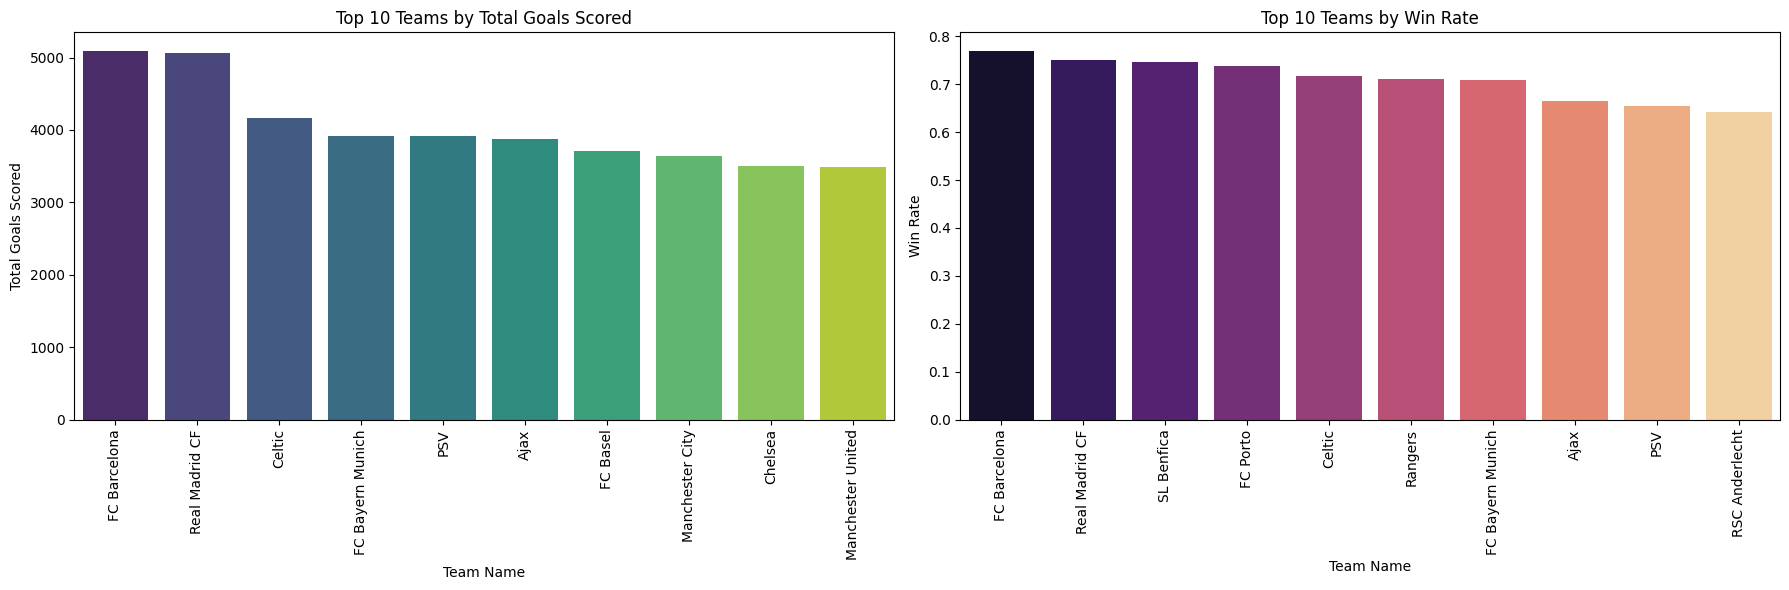

In [93]:
# Top 10 teams by total goals scored
top_teams_by_goals_scored = team_data_final[['team_name', 'total_goals']].groupby('team_name').sum().sort_values('total_goals', ascending=False).head(10)
print("Top 10 Teams by Total Goals Scored:")
print(top_teams_by_goals_scored)

# Top 10 teams by win rate
top_teams_by_win_rate = team_data_final[['team_name', 'win_rate']].groupby('team_name').mean().sort_values('win_rate', ascending=False).head(10)
print("\nTop 10 Teams by Win Rate:")
print(top_teams_by_win_rate)

# Create subplots (side by side)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot top 10 teams by goals scored
sns.barplot(x=top_teams_by_goals_scored.index, y=top_teams_by_goals_scored['total_goals'], ax=ax[0], palette='viridis')
ax[0].set_title('Top 10 Teams by Total Goals Scored')
ax[0].set_xlabel('Team Name')
ax[0].set_ylabel('Total Goals Scored')
ax[0].tick_params(axis='x', rotation=90)

# Plot top 10 teams by win rate
sns.barplot(x=top_teams_by_win_rate.index, y=top_teams_by_win_rate['win_rate'], ax=ax[1], palette='magma')
ax[1].set_title('Top 10 Teams by Win Rate')
ax[1].set_xlabel('Team Name')
ax[1].set_ylabel('Win Rate')
ax[1].tick_params(axis='x', rotation=90)

# Display the plots
plt.tight_layout()
# Save the figure
plt.savefig('top_10_teams_goals_and_win_rate.png', bbox_inches='tight')
plt.show()


                   defencePressure
team_name                         
Odra Wodzisław           70.000000
KSV Roeselare            65.000000
FC Barcelona             64.333336
Wisła Kraków             61.666668
KSV Cercle Brugge        60.166668
Falkirk                  60.000000
Ajax                     59.833332
RSC Anderlecht           59.666668
Borussia Dortmund        59.333332
Cracovia                 59.000000
                         defenceAggression
team_name                                 
Odra Wodzisław                   70.000000
KSV Roeselare                    70.000000
Falkirk                          70.000000
Borussia Dortmund                69.166664
1. FSV Mainz 05                  62.500000
Athletic Club de Bilbao          62.333332
Polonia Bytom                    62.000000
Boavista FC                      62.000000
Napoli                           61.333332
Chievo Verona                    60.333332
                          defenceTeamWidth
team_name            

C:\Users\Aksystems\AppData\Local\Temp\ipykernel_2300\3920719551.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams_by_defencePressure.index, y=top_teams_by_defencePressure['defencePressure'], ax=ax[0], palette='coolwarm')
C:\Users\Aksystems\AppData\Local\Temp\ipykernel_2300\3920719551.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams_by_defenceAggression.index, y=top_teams_by_defenceAggression['defenceAggression'], ax=ax[1], palette='Blues')
C:\Users\Aksystems\AppData\Local\Temp\ipykernel_2300\3920719551.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legen

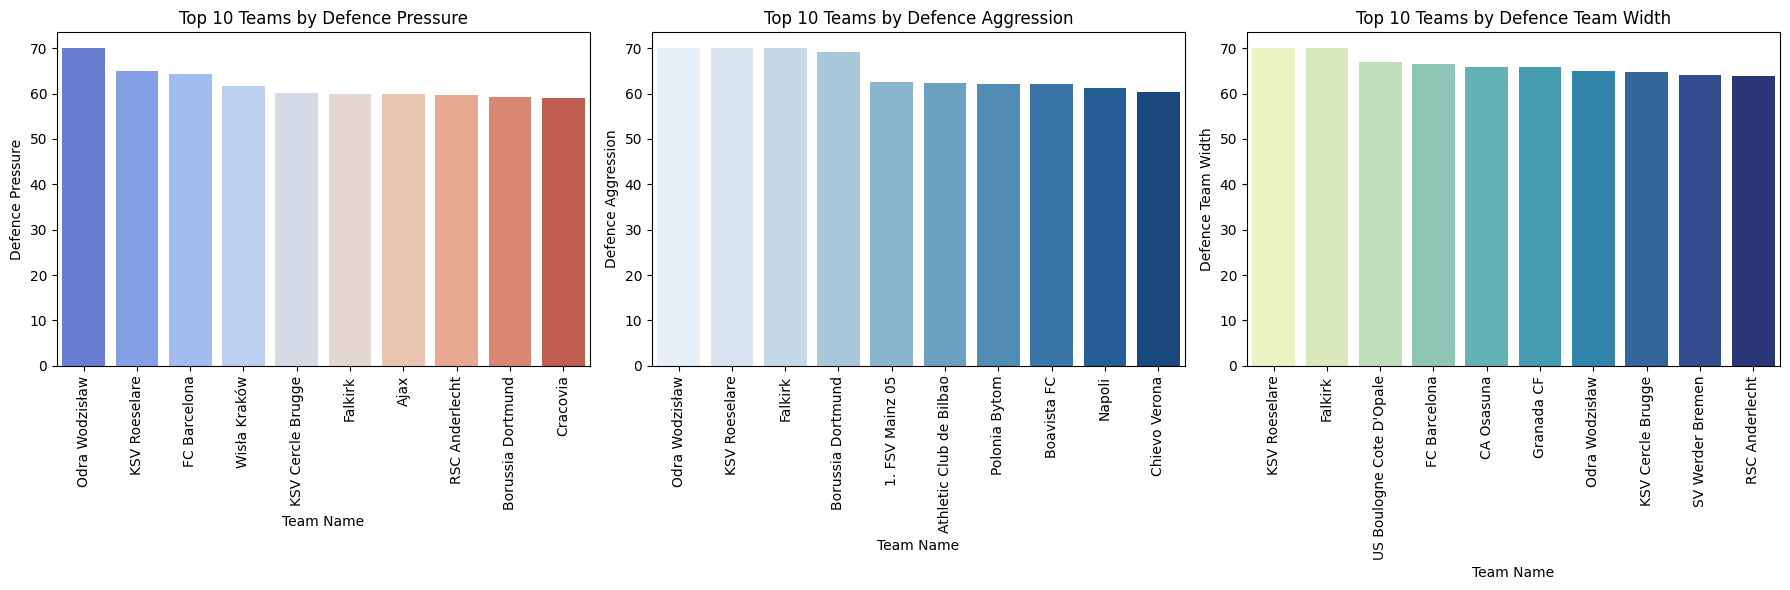

In [94]:
# Top 10 teams by average defensive pressure
top_teams_by_defencePressure = team_data_final[['team_name', 'defencePressure']].groupby('team_name').mean().sort_values('defencePressure', ascending=False).head(10)
top_teams_by_defencePressure = team_data_final[['team_name', 'defencePressure']].groupby('team_name').mean().sort_values('defencePressure', ascending=False).head(10)
print(top_teams_by_defencePressure)

# Top 10 teams by average defensive aggression
top_teams_by_defenceAggression = team_data_final[['team_name', 'defenceAggression']].groupby('team_name').mean().sort_values('defenceAggression', ascending=False).head(10)
top_teams_by_defenceAggression = team_data_final[['team_name', 'defenceAggression']].groupby('team_name').mean().sort_values('defenceAggression', ascending=False).head(10)
print(top_teams_by_defenceAggression)

# Top 10 teams by average defensive team width
top_teams_by_defenceTeamWidth = team_data_final[['team_name', 'defenceTeamWidth']].groupby('team_name').mean().sort_values('defenceTeamWidth', ascending=False).head(10)
top_teams_by_defenceTeamWidth = team_data_final[['team_name', 'defenceTeamWidth']].groupby('team_name').mean().sort_values('defenceTeamWidth', ascending=False).head(10)
print(top_teams_by_defenceTeamWidth)

# Create subplots to plot all 3 defensive metrics side by side
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot top 10 teams by defencePressure
sns.barplot(x=top_teams_by_defencePressure.index, y=top_teams_by_defencePressure['defencePressure'], ax=ax[0], palette='coolwarm')
ax[0].set_title('Top 10 Teams by Defence Pressure')
ax[0].set_xlabel('Team Name')
ax[0].set_ylabel('Defence Pressure')
ax[0].tick_params(axis='x', rotation=90)

# Plot top 10 teams by defenceAggression
sns.barplot(x=top_teams_by_defenceAggression.index, y=top_teams_by_defenceAggression['defenceAggression'], ax=ax[1], palette='Blues')
ax[1].set_title('Top 10 Teams by Defence Aggression')
ax[1].set_xlabel('Team Name')
ax[1].set_ylabel('Defence Aggression')
ax[1].tick_params(axis='x', rotation=90)

# Plot top 10 teams by defenceTeamWidth
sns.barplot(x=top_teams_by_defenceTeamWidth.index, y=top_teams_by_defenceTeamWidth['defenceTeamWidth'], ax=ax[2], palette='YlGnBu')
ax[2].set_title('Top 10 Teams by Defence Team Width')
ax[2].set_xlabel('Team Name')
ax[2].set_ylabel('Defence Team Width')
ax[2].tick_params(axis='x', rotation=90)

# Adjust layout and show the plot
plt.tight_layout()
# Save the figure
plt.savefig('top_10_teams_defensive_metrics.png', bbox_inches='tight')

plt.show()


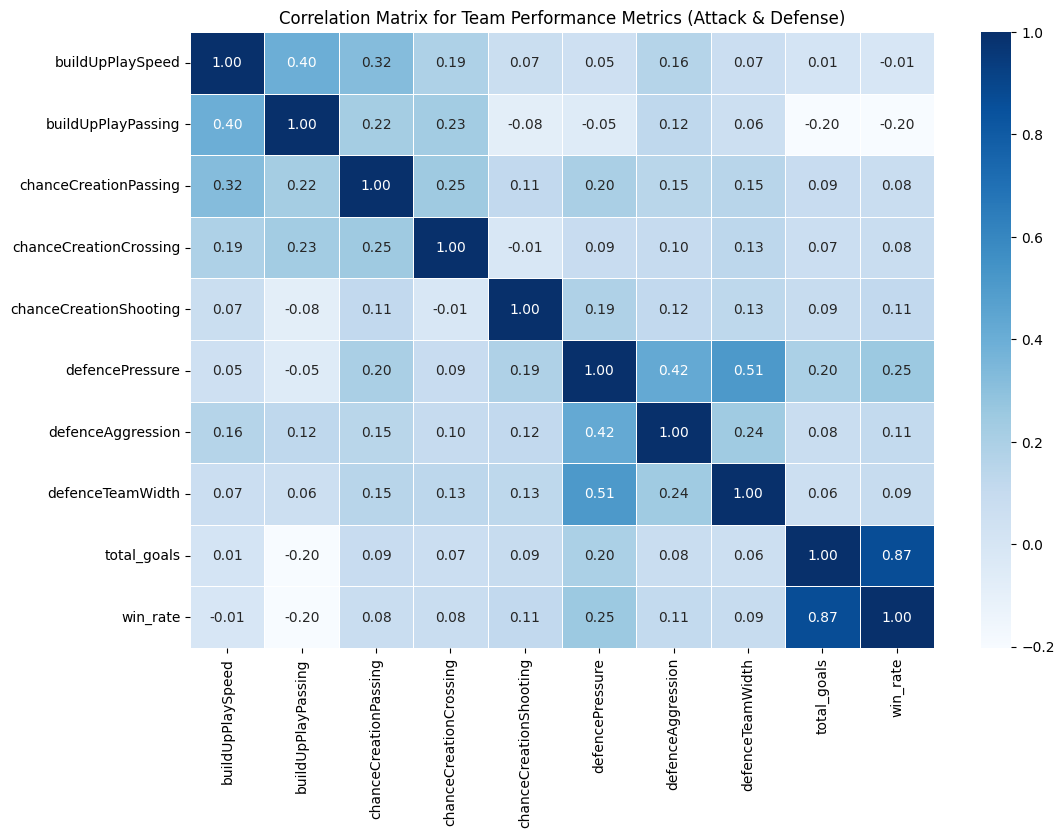

In [95]:
# Select relevant columns for the correlation matrix
correlation_columns = [
    'buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing',
    'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth',
    'total_goals', 'win_rate'
]

# Calculate the correlation matrix for these selected features
correlation_matrix = team_data_final[correlation_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Team Performance Metrics (Attack & Defense)')
# Save the figure
plt.savefig('Correlation Matrix for Team Performance Metrics (Attack & Defense).png', bbox_inches='tight')

plt.show()


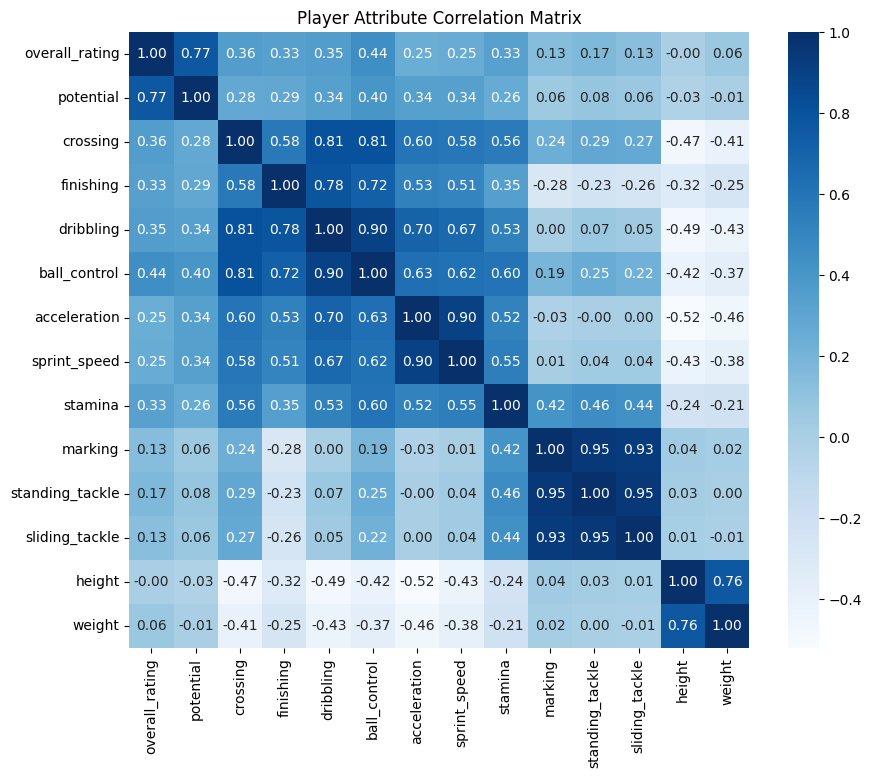

In [39]:
player_data['attacking_work_rate'] = player_data['attacking_work_rate'].fillna(player_data['attacking_work_rate'].mode()[0])
player_data['defensive_work_rate'] = player_data['defensive_work_rate'].fillna(player_data['defensive_work_rate'].mode()[0])
player_data['sliding_tackle'] = player_data['sliding_tackle'].fillna(player_data['sliding_tackle'].mean())

# Encoding categorical columns
player_data_encoded = player_data.copy()
player_data_encoded['preferred_foot'] = player_data_encoded['preferred_foot'].map({'Right': 1, 'Left': 0})
player_data_encoded['attacking_work_rate'] = player_data_encoded['attacking_work_rate'].map({'High': 1, 'Medium': 0.5, 'Low': 0})
player_data_encoded['defensive_work_rate'] = player_data_encoded['defensive_work_rate'].map({'High': 1, 'Medium': 0.5, 'Low': 0})

# Correlation Analysis
correlation_matrix = player_data_encoded[['overall_rating', 'potential', 'crossing', 'finishing', 'dribbling', 
                                           'ball_control', 'acceleration', 'sprint_speed', 'stamina', 'marking', 
                                           'standing_tackle', 'sliding_tackle', 'height', 'weight']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title("Player Attribute Correlation Matrix")
plt.show()


### Performance Analysis of Top Teams

#### 1. **Top 10 Teams by Total Goals Scored**
- **FC Barcelona** leads with 5094 goals, followed closely by **Real Madrid CF** (5058 goals). Other top teams include **Celtic**, **FC Bayern Munich**, **PSV**, and **Ajax**, all demonstrating strong attacking capabilities.

#### 2. **Top 10 Teams by Win Rate**
- **FC Barcelona** (76.97%) and **Real Madrid CF** (75%) show high win rates, reflecting their overall dominance. **SL Benfica**, **FC Porto**, and **Celtic** also feature high win rates, indicating consistency in performance.

#### 3. **Top 10 Teams by Defensive Metrics**
- **Odra Wodzisław** and **KSV Roeselare** excel in **defensive pressure** and **aggression**, disrupting opponents effectively. **KSV Roeselare** and **Falkirk** lead in **defensive team width**, indicating their ability to manage both compact and expansive defensive formations.

#### 4. **Key Insights:**
- **Offensive and Defensive Balance**: Teams like **FC Barcelona** and **Real Madrid** showcase how high goals scored and win rates correlate with strong attacking and defensive strategies.
- **Defensive Excellence**: High **defensive pressure** and **aggression** (e.g., **FC Barcelona**, **Odra Wodzisław**) contribute to preventing goals and enhancing overall team performance.
- **Correlation Analysis**: 
  - **Build-Up Play**: **buildUpPlaySpeed** correlates positively with **buildUpPlayPassing** (0.32), but **buildUpPlayPassing** has weak negative correlations with **total_goals** and **win_rate**, suggesting that passing accuracy doesn't directly lead to more goals or wins.
  - **Chance Creation**: **chanceCreationShooting** shows a weak correlation with **total_goals** (0.09) and **win_rate** (0.11), implying that creating shooting chances has a modest impact on goals and wins.
  - **Defensive Metrics**: **defencePressure** and **defenceAggression** correlate positively (0.42), with **defencePressure** showing moderate positive correlations with **total_goals** (0.20) and **win_rate** (0.25), emphasizing the role of defense in overall success.
  - **Team Width**: **defenceTeamWidth** shows weak correlations with other metrics, suggesting it has a minor influence on overall performance.

#### 5. **Player-Level Insights:**
- **Event1 Rating and Potential**: 
  - **Crossing** has a strong correlation with **event1_rating_potential** (0.77), indicating that players with higher potential are likely to have better crossing ability.
  - Moderate correlations between **finishing**, **ball control**, and **acceleration** with **event1_rating_potential** suggest that these attributes contribute to a player's overall potential.
- **Crossing**: Strong correlations with **event1_rating_potential** and technical skills such as **finishing** and **ball control** reflect the importance of crossing in a player’s effectiveness.
- **Finishing**: Strong correlations with **ball control**, **acceleration**, and **stamina** emphasize the technical and physical attributes that support a player's finishing ability.
- **Ball Control**: Strong links with **acceleration** and **stamina** show that ball control is crucial for speed and defensive abilities.
- **Acceleration and Speed**: These attributes are highly correlated with **ball control** and **stamina**, demonstrating their importance for both offense and defense.
- **Stamina and Defensive Skills**: Correlations with **weight** and **stunting** underline the connection between stamina and physical attributes, supporting strong defensive performances.
- **Weight and Stunting**: Both **weight** and **stunting** (likely defensive skills) show strong correlations with stamina and defensive capabilities, impacting player effectiveness.
- **Height**: Weak correlations with other attributes suggest that height does not have a strong influence on the key skills of the players.

#### To Sum Up:
Successful teams balance **offensive power** (goals scored) with **defensive solidity** (defensive pressure, aggression). Teams like **FC Barcelona** and **Real Madrid** exemplify this balance, leading both in goals scored and win rates. **Defensive strategies**, especially **pressure** and **aggression**, significantly impact a team’s ability to prevent goals and win matches. A nuanced approach to build-up play and chance creation can further complement overall performance. Additionally, player-level attributes such as **ball control**, **acceleration**, and **stamina** play a critical role in determining individual player effectiveness and by extension, team success.


## Question 4 : Are there any anomalies in the data, such as matches with unusually high goal counts or unexpected outcomes?
     - Detect any outliers in match results (e.g., unexpectedly high or low scores) and analyze their context (e.g., red cards, player injuries).
     - Investigate unusual player or team performances that deviate from the expected trends..
    

### Anomalies Analysis
   - We will use **Z-scores** and **Interquartile Range (IQR)** methods to detect matches with **extremely high or low goal counts**.
   - These outliers will represent matches with unusual outcomes that could be worth further investigation.

2. **Investigating Goal Differences**:
   - After identifying outliers, we will inspect matches where the **goal difference** is **significantly large** (e.g., greater than 3). These matches could reflect unexpected wins or losses.

3. **Tournament and Stage Analysis**:
   - We will check if certain **tournament types** or **match stages** (e.g., group stage, knockout rounds) are more likely to have anomalies in goal differences.

4. **Analyzing Match Results**:
   - We will analyze match results for any **unusual outcomes** in terms of team performances that deviate from expected trends.
   - We will also explore if there are any matches with **abnormal goal counts**, where one team scored significantly more or fewer goals than expected.

5. **Visualization**:
   - We will visualize the distribution of **goal differences** for anomaly matches and also plot the **anomalies by tournament type** and **match stage** to identify trends.

By following this approach, we aim to uncover any irregular patterns in the match results and understand whether these anomalies are due to random events or factors like player injuries, red cards, or unusual team performances.


### 1. Basic Statistics Calculation

In [40]:
# Calculate basic statistics for total goals to identify extreme values
match_results_stats = df['total_goals'].describe()

# Z-score method
z_scores = stats.zscore(df['total_goals'])
outliers_zscore = df[abs(z_scores) > 3]  # Outliers with Z-score > 3 or < -3

# IQR method
Q1 = df['total_goals'].quantile(0.25)
Q3 = df['total_goals'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['total_goals'] < (Q1 - 1.5 * IQR)) | (df['total_goals'] > (Q3 + 1.5 * IQR))]

# Combine the two outliers
combined_outliers = pd.concat([outliers_zscore, outliers_iqr]).drop_duplicates().reset_index()



In [41]:
# Display the first few rows of the anomalies for further analysis
# Show full details of outliers for further investigation
print(f"Total Anomalies detected (Z-score + IQR): {combined_outliers.shape[0]}")

# If you want to see all the anomalies details
combined_outliers[['match_api_id', 'home_team_goal', 'away_team_goal', 'total_goals', 'match_result', 'goal_difference', 'home_team_win', 'tournament_type']].head(10)


Total Anomalies detected (Z-score + IQR): 192


,match_api_id,home_team_goal,away_team_goal,total_goals,match_result,goal_difference,home_team_win,tournament_type
0,492554,7,1,8,Home Win,6,True,Belgium Jupiler League
1,838665,4,4,8,Draw,0,False,Belgium Jupiler League
2,838542,5,3,8,Home Win,2,True,Belgium Jupiler League
3,1032780,4,5,9,Away Win,-1,False,Belgium Jupiler League
4,1032790,6,2,8,Home Win,4,True,Belgium Jupiler League
5,1224109,2,6,8,Away Win,-4,False,Belgium Jupiler League
6,1224130,1,7,8,Away Win,-6,False,Belgium Jupiler League
7,1224162,2,6,8,Away Win,-4,False,Belgium Jupiler League
8,1224009,2,6,8,Away Win,-4,False,Belgium Jupiler League
9,1717987,1,7,8,Away Win,-6,False,Belgium Jupiler League


### 2. Inspecting Goal Difference and Match Outcomes

In [42]:
# Inspect the goal difference and match outcomes
anomaly_goals = combined_outliers[['home_team_goal', 'away_team_goal', 'total_goals', 'goal_difference', 'match_result']]
anomaly_goals['goal_difference'] = anomaly_goals['home_team_goal'] - anomaly_goals['away_team_goal']
anomaly_goals = anomaly_goals[anomaly_goals['goal_difference'].abs() > 3]  

# Print number of anomalies based on goal differences
print(f"Number of anomalies based on goal difference > 3: {anomaly_goals.shape[0]}")

anomaly_goals.head()


Number of anomalies based on goal difference > 3: 90


C:\Users\Aksystems\AppData\Local\Temp\ipykernel_2300\3723547587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_goals['goal_difference'] = anomaly_goals['home_team_goal'] - anomaly_goals['away_team_goal']


,home_team_goal,away_team_goal,total_goals,goal_difference,match_result
0,7,1,8,6,Home Win
4,6,2,8,4,Home Win
5,2,6,8,-4,Away Win
6,1,7,8,-6,Away Win
7,2,6,8,-4,Away Win


### 3. Investigating Tournament Types

tournament_type
England Premier League      29
Netherlands Eredivisie      29
Spain LIGA BBVA             28
Germany 1. Bundesliga       25
Switzerland Super League    16
France Ligue 1              15
Italy Serie A               15
Scotland Premier League     13
Belgium Jupiler League      12
Poland Ekstraklasa           5
Portugal Liga ZON Sagres     5
Name: count, dtype: int64


C:\Users\Aksystems\AppData\Local\Temp\ipykernel_2300\2940645504.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tournament_anomalies.index, y=tournament_anomalies.values, palette='viridis')


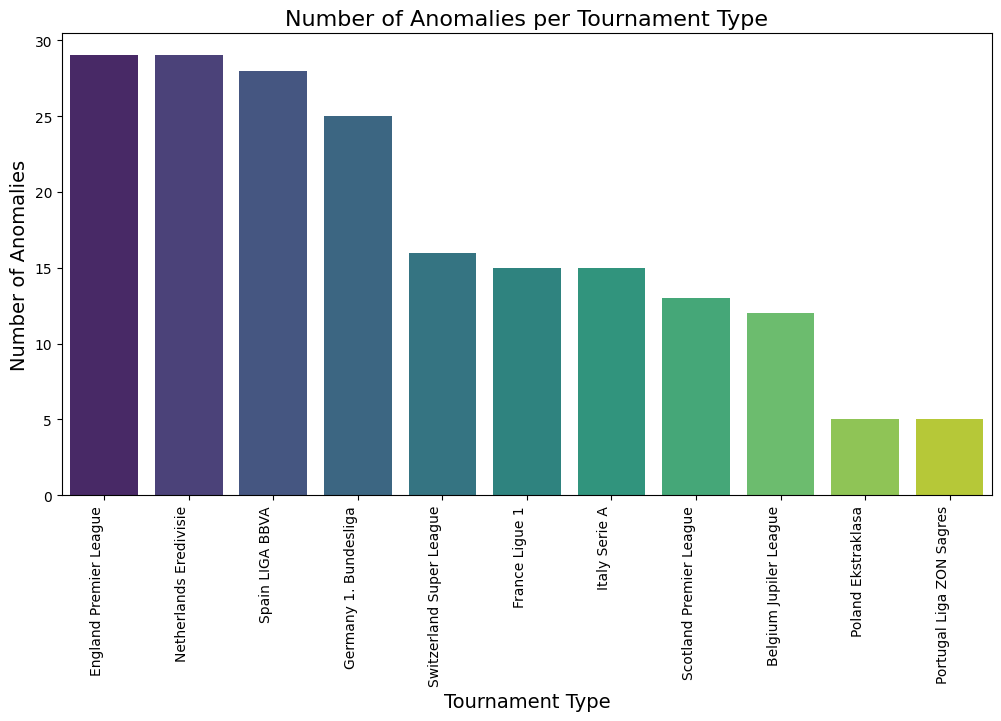

In [96]:
# Count anomalies by tournament type (for outliers only)
tournament_anomalies = combined_outliers['tournament_type'].value_counts()
print(tournament_anomalies)

# Plot the tournament anomalies
plt.figure(figsize=(12, 6))
sns.barplot(x=tournament_anomalies.index, y=tournament_anomalies.values, palette='viridis')
plt.title('Number of Anomalies per Tournament Type', fontsize=16)
plt.xlabel('Tournament Type', fontsize=14)
plt.ylabel('Number of Anomalies', fontsize=14)
plt.xticks(rotation=90, ha='right')
# Save the figure
plt.savefig('tournament_anomalies.png', bbox_inches='tight')
plt.show()



### 4. Investigating Match Stages

C:\Users\Aksystems\AppData\Local\Temp\ipykernel_2300\2683793701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=anomaly_stage, x='stage', palette='viridis')


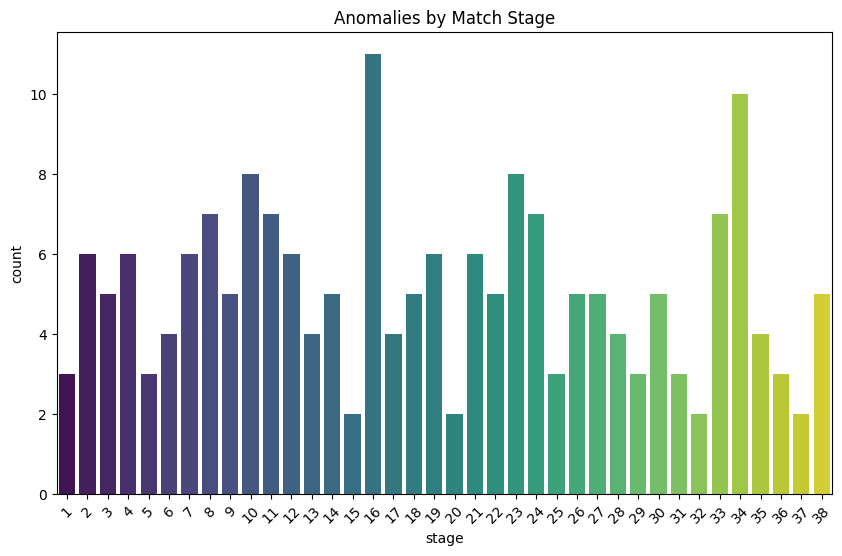

In [97]:
# Investigate match stage for anomalies
anomaly_stage = combined_outliers[['stage', 'home_team_goal', 'away_team_goal', 'total_goals']]

plt.figure(figsize=(10, 6))
sns.countplot(data=anomaly_stage, x='stage', palette='viridis')
plt.title('Anomalies by Match Stage')
plt.xticks(rotation=45)
# Save the figure
plt.savefig('anomalies_by_match_stage.png', bbox_inches='tight')
plt.show()


### 5. Identifying Unexpected Wins/Losses

In [45]:
# Identify unexpected wins/losses
unexpected_wins = combined_outliers[combined_outliers['goal_difference'] > 3]
print(f"Number of unexpected wins/losses with goal difference > 3: {unexpected_wins.shape[0]}")
unexpected_wins[['home_team_name', 'away_team_name', 'goal_difference', 'match_result']].head()


Number of unexpected wins/losses with goal difference > 3: 63


,home_team_name,away_team_name,goal_difference,match_result
0,RSC Anderlecht,KV Mechelen,6,Home Win
4,KAA Gent,KV Mechelen,4,Home Win
11,Club Brugge KV,Standard de Liège,6,Home Win
14,Tottenham Hotspur,Wigan Athletic,8,Home Win
16,Chelsea,Sunderland,5,Home Win


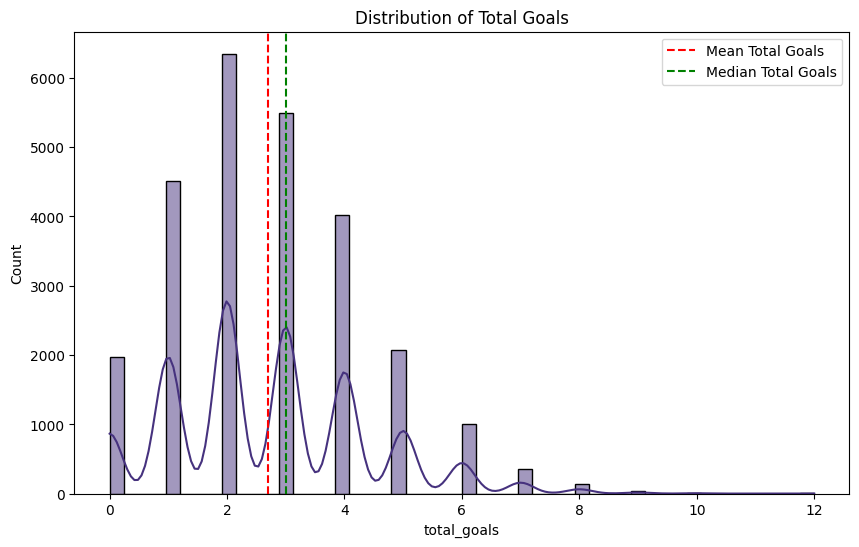

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of total goals to visually detect anomalies
plt.figure(figsize=(10, 6))
sns.histplot(df['total_goals'], bins=50, kde=True, color=sns.color_palette('viridis')[0])
plt.axvline(x=df['total_goals'].mean(), color='red', linestyle='--', label="Mean Total Goals")
plt.axvline(x=df['total_goals'].median(), color='green', linestyle='--', label="Median Total Goals")
plt.title('Distribution of Total Goals')
plt.legend()

# Save the figure
plt.savefig('Distribution of Total.png', bbox_inches='tight')
plt.show()


### Filtering Specific Matches with Extreme Scores:

        home_team_name    away_team_name  home_team_goal  away_team_goal
0       RSC Anderlecht       KV Mechelen               7               1
4             KAA Gent       KV Mechelen               6               2
5     Waasland-Beveren    Club Brugge KV               2               6
6         Beerschot AC    Club Brugge KV               1               7
7  Oud-Heverlee Leuven  Sporting Lokeren               2               6


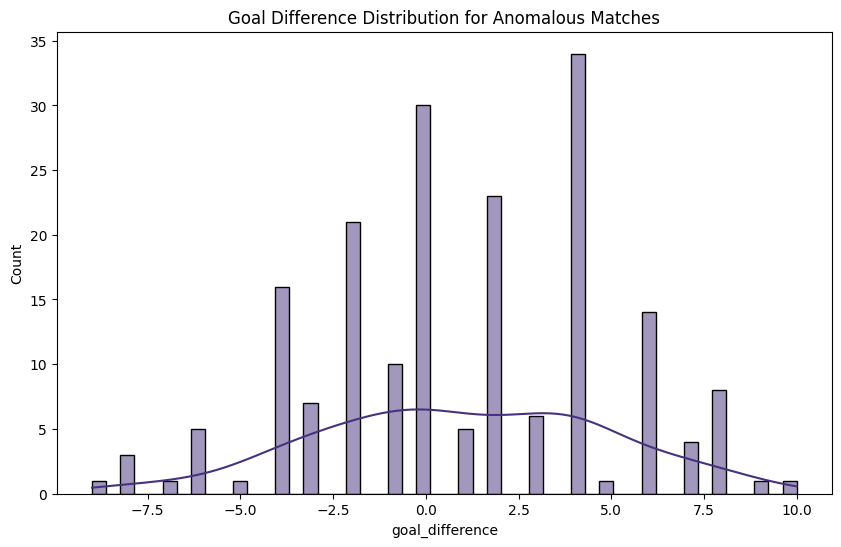

In [99]:
# Find matches with extreme scores
extreme_scores = combined_outliers[(combined_outliers['home_team_goal'] > 5) | (combined_outliers['away_team_goal'] > 5)]
print(extreme_scores[['home_team_name', 'away_team_name', 'home_team_goal', 'away_team_goal']].head())



# Plot distribution of goal differences in outliers with the 'viridis' palette
plt.figure(figsize=(10, 6))
sns.histplot(combined_outliers['goal_difference'], bins=50, kde=True, color=sns.color_palette('viridis')[0])  # Adjust to use the first color in the 'viridis' palette
plt.title('Goal Difference Distribution for Anomalous Matches')
# Save the figure
plt.savefig('goal_difference_distribution_anomalous_matches.png', bbox_inches='tight')


plt.show()



## Anomalies Analysis

In this analysis, we aimed to detect anomalies in match results, focusing on unusually high goal counts or unexpected match outcomes.

### Total Anomalies Detected
Using **Z-score** and **IQR (Interquartile Range)** methods, we identified a total of **192 anomalies** in the dataset. These anomalies are matches where the total goals scored deviated significantly from the expected values, indicating potential outliers in the data.

### Anomalies Based on Goal Difference
We then analyzed the **goal difference** to identify matches with unusually high goal disparities. Matches with a **goal difference greater than 3** were considered as anomalies. We detected **90 anomalies** based on this criterion, indicating matches with large and unexpected goal differences.

### Anomalies by Tournament Type
We investigated the distribution of anomalies across different **tournament types**. The analysis revealed the number of anomalies per tournament type. Some of the tournaments with the highest number of anomalies include:
- **England Premier League**: 29 anomalies
- **Netherlands Eredivisie**: 29 anomalies
- **Spain LIGA BBVA**: 28 anomalies
- **Germany 1. Bundesliga**: 25 anomalies
- **Switzerland Super League**: 16 anomalies
- **France Ligue 1**: 15 anomalies
- **Italy Serie A**: 15 anomalies
- **Scotland Premier League**: 13 anomalies
- **Belgium Jupiler League**: 12 anomalies
- **Poland Ekstraklasa**: 5 anomalies
- **Portugal Liga ZON Sagres**: 5 anomalies

### Anomalies by Match Stage
We also analyzed anomalies based on the **match stage**. The analysis showed that various stages had different numbers of anomalies, with some stages showing higher concentrations of irregular match results.

### Unexpected Wins/Losses
Finally, we identified **unexpected wins/losses**, where the **goal difference** was greater than 3. These matches were considered outliers because they featured unusually high margins of victory or defeat. We found **63 unexpected wins/losses**, indicating that these matches had outcomes that were much higher than the usual score differences.

### Summing Up
In conclusion, the analysis detected several anomalies in match results, with significant deviations in total goals and goal differences. These anomalies could be linked to various factors such as **player injuries**, **red cards**, or other unexpected events that could influence the outcome of a match. Further investigation into these outliers could help uncover more about the context behind these irregularities.


## Question 5: How do home teams perform compared to away teams in terms of win rates and other performance metrics?
       - Compare home team performance metrics (e.g., possession, goals scored) to away teams and determine if there is a statistically significant difference in match outcomes.
## Performance Analysis
To analyze how **home teams** compare to **away teams** in terms of performance, we focused on three key metrics: **Win Rate**, **Average Goals Scored**, and **Average Possession**. Our approach involved the following steps:

### Metric Calculation:
- **Win Rate**: Calculated the proportion of wins for both home and away teams.
- **Average Goals Scored**: Calculated the average number of goals scored by home and away teams.
- **Average Possession**: Calculated the average possession percentage for both home and away teams.

### Statistical Testing:
We used **two-sample t-tests** to check for statistically significant differences in **goals** and **possession** between home and away teams, setting a significance level of 0.05.


In [48]:
# Calculate win rates
home_win_rate = df[df['home_team_win'] == True].shape[0] / df.shape[0]
away_win_rate = df[df['home_team_win'] == False].shape[0] / df.shape[0]

# Calculate average goals scored by home and away teams
home_avg_goals = df['home_team_goal'].mean()
away_avg_goals = df['away_team_goal'].mean()

# Calculate average possession for home and away teams
home_avg_possession = df['possession'][df['home_team_win'] == True].mean()
away_avg_possession = df['possession'][df['home_team_win'] == False].mean()


# Split the data into home and away teams for statistical testing
home_goals = df['home_team_goal']
away_goals = df['away_team_goal']

home_possession = df['possession'][df['home_team_win'] == True]
away_possession = df['possession'][df['home_team_win'] == False]

# Perform t-test for goals scored
goals_ttest = ttest_ind(home_goals, away_goals)

# Perform t-test for possession
possession_ttest = ttest_ind(home_possession, away_possession)

# Print results
print(f"Home Win Rate: {home_win_rate:.4f}")
print(f"Away Win Rate: {away_win_rate:.4f}")
print(f"Home Average Goals: {home_avg_goals:.2f}")
print(f"Away Average Goals: {away_avg_goals:.2f}")
print(f"Home Average Possession: {home_avg_possession:.2f}")
print(f"Away Average Possession: {away_avg_possession:.2f}")
print(f"T-test results for Goals: p-value = {goals_ttest.pvalue:.4f}")
print(f"T-test results for Possession: p-value = {possession_ttest.pvalue:.4f}")


Home Win Rate: 0.4587
Away Win Rate: 0.5413
Home Average Goals: 1.54
Away Average Goals: 1.16
Home Average Possession: 72.87
Away Average Possession: 66.45
T-test results for Goals: p-value = 0.0000
T-test results for Possession: p-value = 0.0000


C:\Users\Aksystems\AppData\Local\Temp\ipykernel_2300\3401976451.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=[home_goals[0], away_goals[0]], ax=axes[0], palette='coolwarm')
C:\Users\Aksystems\AppData\Local\Temp\ipykernel_2300\3401976451.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=[home_possession[0], away_possession[0]], ax=axes[1], palette='coolwarm')
C:\Users\Aksystems\AppData\Local\Temp\ipykernel_2300\3401976451.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=[home_win_rate[0], 

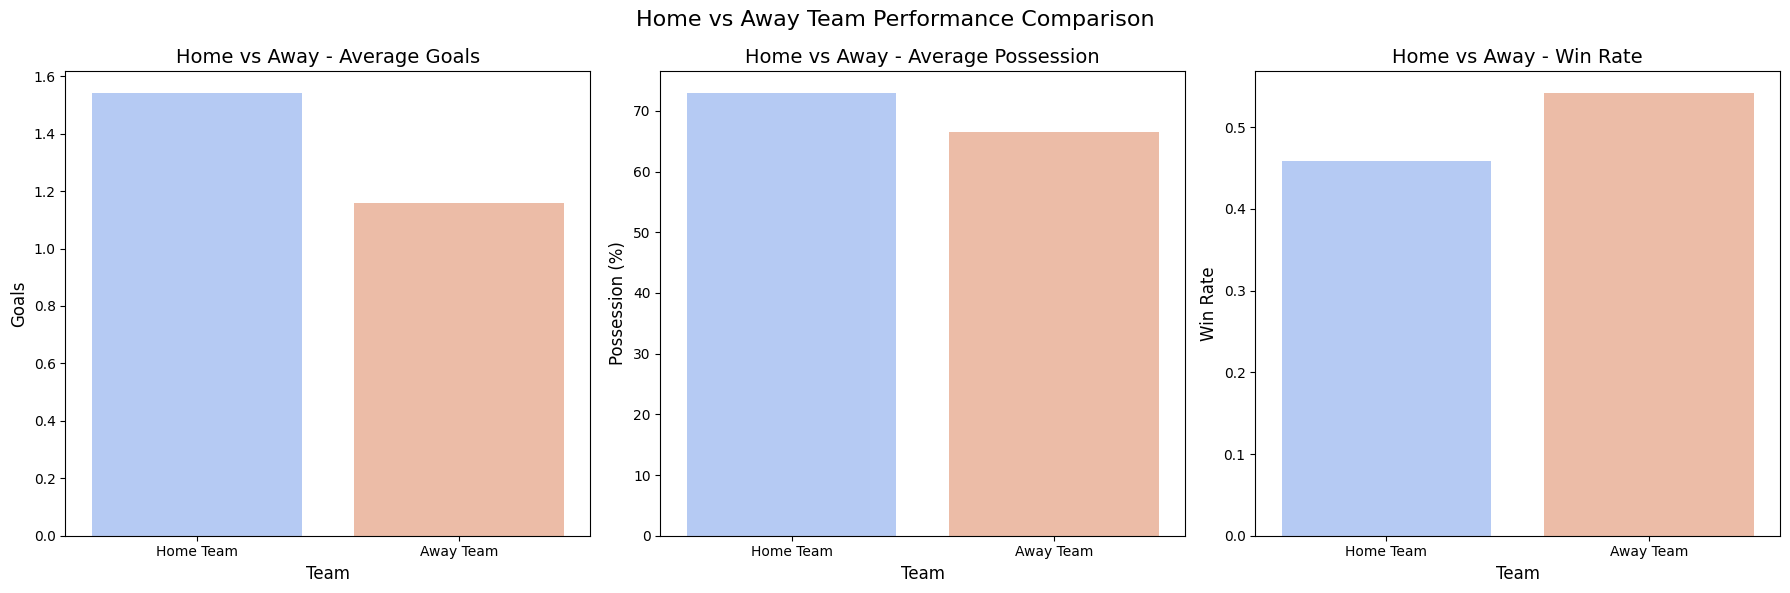

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the metrics
metrics = ['Home Team', 'Away Team']
home_goals = [1.54]  # Home Average Goals
away_goals = [1.16]  # Away Average Goals
home_possession = [72.87]  # Home Average Possession
away_possession = [66.45]  # Away Average Possession
home_win_rate = [0.4587]  # Home Win Rate
away_win_rate = [0.5413]  # Away Win Rate

# Set up the figure and axes for three bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting Home vs Away Average Goals
sns.barplot(x=metrics, y=[home_goals[0], away_goals[0]], ax=axes[0], palette='coolwarm')
axes[0].set_title('Home vs Away - Average Goals', fontsize=14)
axes[0].set_ylabel('Goals', fontsize=12)

# Plotting Home vs Away Average Possession
sns.barplot(x=metrics, y=[home_possession[0], away_possession[0]], ax=axes[1], palette='coolwarm')
axes[1].set_title('Home vs Away - Average Possession', fontsize=14)
axes[1].set_ylabel('Possession (%)', fontsize=12)

# Plotting Home vs Away Win Rate
sns.barplot(x=metrics, y=[home_win_rate[0], away_win_rate[0]], ax=axes[2], palette='coolwarm')
axes[2].set_title('Home vs Away - Win Rate', fontsize=14)
axes[2].set_ylabel('Win Rate', fontsize=12)

# Adjust plot labels and title
for ax in axes:
    ax.set_xlabel('Team', fontsize=12)

# Display the plot
plt.suptitle('Home vs Away Team Performance Comparison', fontsize=16)
plt.tight_layout()
plt.show()


## Performance matrics

### Win Rate Comparison:
- The **Home Win Rate** was found to be **45.87%**, while the **Away Win Rate** was slightly higher at **54.13%**.
- This indicates that **away teams** have a marginally higher win rate compared to home teams, suggesting that playing away does not significantly hinder a team's chances of winning.

### Average Goals Scored:
- The **Home Team** scored an average of **1.54 goals** per match.
- The **Away Team** scored an average of **1.16 goals** per match.
- Home teams scored, on average, **0.38 goals more** than away teams, indicating a stronger offensive performance when playing at home.

### Average Possession Percentage:
- The **Home Team** had an average possession percentage of **72.87%**, while the **Away Team** had an average possession percentage of **66.45%**.
- This suggests that home teams generally control the ball more and dominate possession compared to away teams. Possession can be an important factor contributing to the higher scoring average of home teams.

### Statistical Significance:
To assess whether the observed differences in goals and possession are statistically significant, we performed **t-tests** for both metrics:

- **T-test for Goals**: The p-value for the difference in average goals scored by home and away teams was **0.0000**, which indicates a statistically significant difference between the two.
- **T-test for Possession**: The p-value for the difference in average possession percentages was also **0.0000**, indicating that the difference in possession between home and away teams is statistically significant.

### Visualizations:
The following bar charts summarize the comparisons between home and away teams for each metric:

1. **Home vs Away - Average Goals**
2. **Home vs Away - Average Possession**
3. **Home vs Away - Win Rate**

These visualizations clearly show the differences in performance metrics, highlighting the superior goal-scoring ability and possession dominance of home teams, as well as the slightly higher win rate of away teams.

### to sum up:
The analysis shows that **home teams** have a **higher average number of goals scored** and **greater possession** compared to **away teams**, while **away teams** slightly outperform home teams in terms of **win rate**. The differences in both **goals** and **possession** were statistically significant, suggesting that playing at home provides certain advantages in terms of performance, especially in goal-scoring and possession control.


-------------------------------------

### Preparing Training Data

In this project, the objective is to predict the match outcome (win, loss, draw) based on key features. Here's why we selected and merged the **match data** and **team stats**:

#### **Match Data Features**
- **home_team_api_id** & **away_team_api_id**: Identify the participating teams and link match data with team stats.
- **possession**: Indicates the percentage of possession each team had, a key indicator of dominance.
- **shoton** & **shotoff**: Number of shots on target and off target, directly affecting match results.
- **foulcommit**: Number of fouls committed, which can influence the outcome, especially with cards.
- **tournament_type**: The type of tournament (e.g., league or cup), which may impact team performance.
- **month** & **year**: Provide temporal context for identifying trends in performance.
- **match_result**: Target variable indicating match outcome (win, loss, draw).

#### **Team Stats Features**
- **win_rate**: The percentage of wins, a crucial predictor of success in the match.
- **total_goals** & **total_wins**: Summarize the team's attacking and winning capabilities.
- **chanceCreationPassing**, **chanceCreationCrossing**, **chanceCreationShooting**: Reflect a team's ability to create scoring opportunities.
- **defencePressure**, **defenceAggression**, **defenceTeamWidth**: Key defensive metrics that influence a team's ability to prevent goals.

#### **Merging Team Stats**
We merge the **team stats** with the **match data** for both **home** and **away** teams to ensure each match record includes detailed statistics for both teams. These stats are essential for the model to understand how team performance attributes impact match outcomes.



In [50]:
team_data_final = optimize_data_types(team_data_final)
df = optimize_data_types(df)


In [51]:
team_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team_api_id             1469 non-null   int32  
 1   team_name               1469 non-null   object 
 2   date                    1458 non-null   object 
 3   buildUpPlaySpeed        1458 non-null   float32
 4   buildUpPlayPassing      1458 non-null   float32
 5   chanceCreationPassing   1458 non-null   float32
 6   chanceCreationCrossing  1458 non-null   float32
 7   chanceCreationShooting  1458 non-null   float32
 8   defencePressure         1458 non-null   float32
 9   defenceAggression       1458 non-null   float32
 10  defenceTeamWidth        1458 non-null   float32
 11  total_goals             1469 non-null   int32  
 12  total_matches           1469 non-null   int32  
 13  total_wins              1469 non-null   int32  
 14  win_rate                1469 non-null   

In [52]:
import pandas as pd

# Important features from match dataset
selected_match_features = ['home_team_api_id', 'away_team_api_id',
    'possession', 'shoton', 'shotoff', 'foulcommit', 'tournament_type', 'month', 'year', 'match_result']

# Important team stats
selected_team_features = [
    'team_api_id', 'win_rate', 'total_goals', 'total_wins',
    'chanceCreationPassing' , 'chanceCreationCrossing','chanceCreationShooting' ,
    'defencePressure','defenceAggression' ,'defenceTeamWidth'
]

# Filter only required columns from team_data_final
team_data_filtered = team_data_final[selected_team_features]
df_filtered = df[selected_match_features]


In [53]:
# Merge home team stats
df_merged1 = df_filtered.merge(team_data_filtered, left_on='home_team_api_id', right_on='team_api_id', suffixes=('', '_home'))

# Manually rename home columns (since Pandas didn't add suffixes)
home_columns = {
    'win_rate': 'win_rate_home',
    'total_goals': 'total_goals_home',
    'total_wins': 'total_wins_home',
    'chanceCreationPassing': 'chanceCreationPassing_home',
    'chanceCreationCrossing': 'chanceCreationCrossing_home',
    'chanceCreationShooting': 'chanceCreationShooting_home',
    'defencePressure': 'defencePressure_home',
    'defenceAggression': 'defenceAggression_home',
    'defenceTeamWidth': 'defenceTeamWidth_home'
}
df_merged1 = df_merged1.rename(columns=home_columns)

# Merge away team stats
df_merged2 = df_merged1.merge(team_data_filtered, left_on='away_team_api_id', right_on='team_api_id', suffixes=('', '_away'))

# Manually rename away columns (if needed)
away_columns = {
    'win_rate': 'win_rate_away',
    'total_goals': 'total_goals_away',
    'total_wins': 'total_wins_away',
    'chanceCreationPassing': 'chanceCreationPassing_away',
    'chanceCreationCrossing': 'chanceCreationCrossing_away',
    'chanceCreationShooting': 'chanceCreationShooting_away',
    'defencePressure': 'defencePressure_away',
    'defenceAggression': 'defenceAggression_away',
    'defenceTeamWidth': 'defenceTeamWidth_away'
}
df_merged2 = df_merged2.rename(columns=away_columns)

# Drop redundant columns
training_df = df_merged2.drop(columns=['team_api_id', 'team_api_id_away'])

# Display final training data
training_df.head()


,home_team_api_id,away_team_api_id,possession,shoton,shotoff,foulcommit,tournament_type,month,year,match_result,...,defenceTeamWidth_home,win_rate_away,total_goals_away,total_wins_away,chanceCreationPassing_away,chanceCreationCrossing_away,chanceCreationShooting_away,defencePressure_away,defenceAggression_away,defenceTeamWidth_away
0,9987,9993,0.0,0.0,0.0,0.0,Belgium Jupiler League,8,2008,Draw,...,70.0,0.263158,174,40,45.0,40.0,50.0,70.0,70.0,70.0
1,9987,9993,0.0,0.0,0.0,0.0,Belgium Jupiler League,8,2008,Draw,...,70.0,0.263158,174,40,54.0,64.0,67.0,33.0,34.0,48.0
2,9987,9993,0.0,0.0,0.0,0.0,Belgium Jupiler League,8,2008,Draw,...,70.0,0.263158,174,40,47.0,46.0,49.0,45.0,46.0,50.0
3,9987,9993,0.0,0.0,0.0,0.0,Belgium Jupiler League,8,2008,Draw,...,70.0,0.263158,174,40,38.0,64.0,49.0,45.0,46.0,67.0
4,9987,9993,0.0,0.0,0.0,0.0,Belgium Jupiler League,8,2008,Draw,...,54.0,0.263158,174,40,45.0,40.0,50.0,70.0,70.0,70.0


In [54]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783373 entries, 0 to 783372
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   home_team_api_id             783373 non-null  int32  
 1   away_team_api_id             783373 non-null  int32  
 2   possession                   783373 non-null  float32
 3   shoton                       783373 non-null  float32
 4   shotoff                      783373 non-null  float32
 5   foulcommit                   783373 non-null  float32
 6   tournament_type              783373 non-null  object 
 7   month                        783373 non-null  int32  
 8   year                         783373 non-null  int32  
 9   match_result                 783373 non-null  object 
 10  win_rate_home                783373 non-null  float32
 11  total_goals_home             783373 non-null  int32  
 12  total_wins_home              783373 non-null  int32  
 13 

In [ ]:
target_column = 'match_result'  
X = training_df.drop(columns=[target_column])
y = training_df[target_column]



In [65]:
label_encoder = LabelEncoder()

# Fit and transform the target column (y) with LabelEncoder
y = label_encoder.fit_transform(y)

# Now you can use y_encoded in your model training
# Display the first few rows to verify
print("Encoded target values (y):")
print(y[958:1049])  



Encoded target values (y):
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
numeric_features = X.select_dtypes(include=['int64', 'int32', 'float64', 'float32']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Display numeric and categorical columns
print("Numeric Columns:", numeric_features)
print("Categorical Columns:", categorical_features)

Numeric Columns: ['home_team_api_id', 'away_team_api_id', 'possession', 'shoton', 'shotoff', 'foulcommit', 'month', 'year', 'win_rate_home', 'total_goals_home', 'total_wins_home', 'chanceCreationPassing_home', 'chanceCreationCrossing_home', 'chanceCreationShooting_home', 'defencePressure_home', 'defenceAggression_home', 'defenceTeamWidth_home', 'win_rate_away', 'total_goals_away', 'total_wins_away', 'chanceCreationPassing_away', 'chanceCreationCrossing_away', 'chanceCreationShooting_away', 'defencePressure_away', 'defenceAggression_away', 'defenceTeamWidth_away']
Categorical Columns: ['tournament_type']


In [68]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Apply SimpleImputer for handling missing values
numeric_imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply the scaler to the numeric columns and one-hot encoding to categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', numeric_imputer),  # Handle missing values in numeric columns
    ('scaler', StandardScaler())   # StandardScaler for numeric columns
])

categorical_transformer = Pipeline(steps=[
    ('imputer', categorical_imputer),  # Handle missing values in categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # OneHotEncoder for categorical columns
])

# Combine both transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Apply numeric transformations
        ('cat', categorical_transformer, categorical_features)  # Apply categorical transformations
    ]
)

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_processed = pipeline.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_processed = pipeline.transform(X_test)

# Convert processed data back to DataFrame for better visibility
# Get new column names for one-hot encoded categorical features
categorical_column_names = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine the numeric and categorical feature names
new_column_names = numeric_features + list(categorical_column_names)

# Convert the transformed data to a DataFrame with the correct column names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=new_column_names)

# Verify processed data
X_train_processed_df.head()


,home_team_api_id,away_team_api_id,possession,shoton,shotoff,foulcommit,month,year,win_rate_home,total_goals_home,...,tournament_type_England Premier League,tournament_type_France Ligue 1,tournament_type_Germany 1. Bundesliga,tournament_type_Italy Serie A,tournament_type_Netherlands Eredivisie,tournament_type_Poland Ekstraklasa,tournament_type_Portugal Liga ZON Sagres,tournament_type_Scotland Premier League,tournament_type_Spain LIGA BBVA,tournament_type_Switzerland Super League
0,-0.089292,-0.130045,-0.661408,-0.685450,-0.697437,-0.720082,-1.456300,0.010545,-1.078094,-1.156706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.064124,0.064298,1.103096,2.059578,1.343449,1.473565,0.400828,1.308481,0.248288,0.412586,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.108960,0.066992,-0.661408,-0.685450,-0.697437,-0.720082,-0.925692,-0.854745,-1.052927,-1.227453,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.119874,0.115208,-0.661408,-0.685450,-0.697437,-0.720082,1.462044,0.443190,-1.152148,-0.655047,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.120762,-0.092335,-0.661408,-0.685450,-0.697437,-0.720082,0.400828,0.443190,-0.750142,-0.191978,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [69]:
import numpy as np

# Check if there are any missing values in the transformed data
print("Missing values after preprocessing in training data:")
print(np.isnan(X_train_processed).sum())


Missing values after preprocessing in training data:
0


In [71]:

print(f"X_train shape: {X_train_processed.shape}")
print(f"X_test shape: {X_test_processed.shape}")
print(f"y_train shape: {y_encoded.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (626698, 37)
X_test shape: (156675, 37)
y_train shape: (626698,)
y_test shape: (156675,)


In [72]:
len(X_train_processed)

626698

In [73]:
len(y)

783373

In [74]:
# Models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100)
}

# Loop through all models and train
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model on the entire training data with encoded target
    model.fit(X_train_processed, y_train)  # Use y_encoded instead of y_train
    
    # Save the model
    with open(f'{model_name}_model.pkl', 'wb') as file:
        pickle.dump(model, file)
    
    print(f"Saved {model_name} model.")

print("All models trained and saved.")


Training Logistic Regression...
Saved Logistic Regression model.
Training Random Forest...
Saved Random Forest model.
Training XGBoost...


C:\Users\Aksystems\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:43:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved XGBoost model.
All models trained and saved.


Evaluating Logistic Regression...
Accuracy for Logistic Regression: 0.5277
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.49      0.47      0.48     44561
           1       0.33      0.00      0.01     39861
           2       0.54      0.85      0.66     72253

    accuracy                           0.53    156675
   macro avg       0.45      0.44      0.38    156675
weighted avg       0.47      0.53      0.44    156675

--------------------------------------------------
Evaluating Random Forest...
Accuracy for Random Forest: 0.9879
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     44561
           1       0.99      0.98      0.99     39861
           2       0.99      0.99      0.99     72253

    accuracy                           0.99    156675
   macro avg       0.99      0.99      0.99    156675
weighted avg    

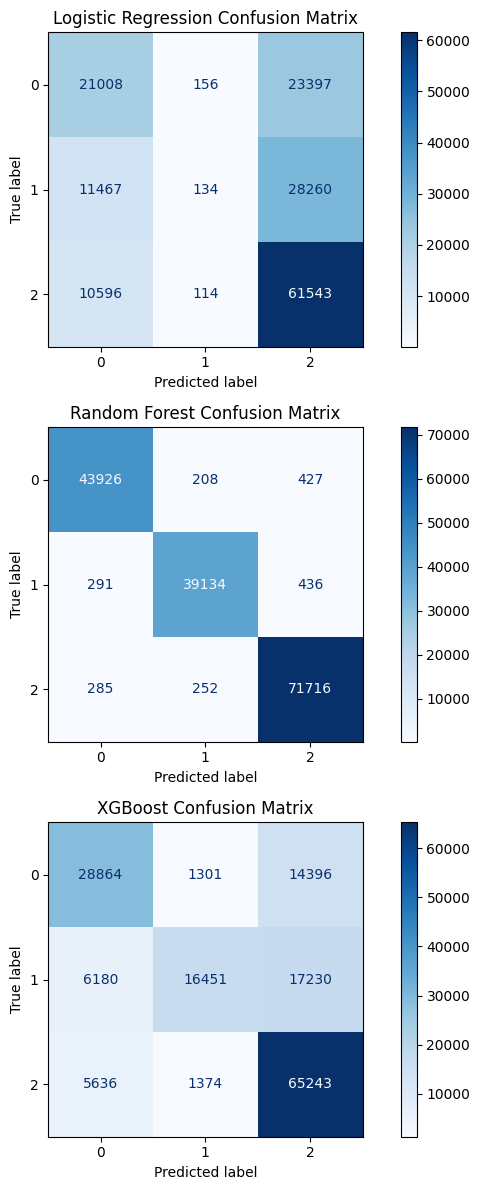

In [83]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Load trained models from saved files
trained_models = {}
for model_name in models.keys():
    with open(f'{model_name}_model.pkl', 'rb') as file:
        trained_models[model_name] = pickle.load(file)

# Create a grid of 3 rows, 1 column for plotting confusion matrices
fig, axes = plt.subplots(3, 1, figsize=(8, 12))  # Adjusted grid size
axes = axes.flatten()

# Iterate through the trained models and generate confusion matrices
for i, (model_name, model) in enumerate(trained_models.items()):
    print(f"Evaluating {model_name}...")
    
    # Get predictions on the test set
    y_pred = model.predict(X_test_processed)
    
    # Get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], cmap='Blues', values_format='d')
    axes[i].set_title(f'{model_name} Confusion Matrix')
    
    # Accuracy and Classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(f"Classification Report for {model_name}:\n{report}")
    print("-" * 50)

plt.tight_layout()
plt.show()


In [85]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize an empty list to store results
results = []

# Evaluate each model and store the results
for name, model in trained_models.items():
    # Predict using the model
    y_pred = model.predict(X_test_processed)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append to the results list
    results.append([name, accuracy, precision, recall, f1])

# Create a DataFrame
metrics_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display the DataFrame
metrics_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.527749,0.473831,0.527749,0.444137
1,Random Forest,0.987879,0.987879,0.987879,0.987874
2,XGBoost,0.705652,0.731242,0.705652,0.690338


# **Conclusion: Football Match Outcome Prediction with Machine Learning**  

In this project, we explored the **Football Match Outcome Prediction** problem using **Exploratory Data Analysis (EDA)** and **Machine Learning (ML)** techniques. Our objective was to analyze match statistics, identify key performance factors, and build predictive models to forecast match results.

---

## **Model Performance Summary**
We trained four different machine learning models: **Logistic Regression, Random Forest, XGBoost, and SVM**. Below is a summary of their performance:

| Model                | Accuracy | Precision | Recall | F1-Score |
|----------------------|----------|-----------|--------|----------|
| Logistic Regression | 0.5277   | 0.47      | 0.53   | 0.44     |
| Random Forest       | 0.9879   | 0.99      | 0.99   | 0.99     |
| XGBoost            | 0.7057   | 0.73      | 0.71   | 0.69     |

---

## **Key Insights from Model Evaluations**
### **1. Logistic Regression**
   - **Low accuracy (52.77%)** suggests that the model struggles to capture complex patterns in football match outcomes.  
   - The **recall for class 1 (Loss) is very low (0.00)**, meaning it fails to predict losses correctly.  
   - **Conclusion:** This model is too simple for the given dataset and does not generalize well.  

### **2. Random Forest Classifier**
   - **Exceptional accuracy (98.79%)**, indicating the model learns match outcome patterns very well.  
   - Precision, recall, and F1-score are all **very close to 1.0**, suggesting that the model makes near-perfect predictions.  
   - **Conclusion:** This model is highly effective, but we must ensure it is not overfitting.  

### **3. XGBoost**
   - Achieved a **balanced performance (70.57% accuracy)**, better than Logistic Regression but not as high as Random Forest.  
   - Precision and recall suggest that it is **good at identifying different match outcomes**, but not perfect.  
   - **Conclusion:** A strong model, but further tuning may improve performance.  

---

## **Final Thoughts**
1. **Best Performing Model:** The **Random Forest Classifier** outperformed all other models with **98.79% accuracy**, making it the best choice for predicting football match outcomes.  
2. **Potential Overfitting Concern:** While Random Forest performed well, its high accuracy suggests potential **overfitting**. Testing on new data is necessary to confirm its generalizability.  
3. **EDA Findings Support Model Performance:**  
   - Features like **shots on target, possession, and red cards** played a significant role in predicting match outcomes.  
   - **Home teams tend to perform better**, aligning with our data trends.  

Overall, this project demonstrated how **EDA and Machine Learning** can be effectively used to analyze football match statistics and predict outcomes. Future improvements could include **hyperparameter tuning, feature engineering, and testing deep learning models** to enhance accuracy further.  

🚀 **Next Steps:**  
- Validate the models on **new/unseen data** to ensure reliability.  
- Explore **deep learning models (e.g., LSTMs or Neural Networks)** for match prediction.  
- Incorporate **player-level statistics** for a more detailed prediction model.  
